## Unsupervised machine learning

# Steps followed:
### 1) Delete the duplicated columns
### 2) Delete columns that has more than 5% of outliers
### 3) Split data to Data for clustering and labels for testing 
### 4) Find best K for the 3 functions KMeans ++, Spectral cluster, and Agglomerative Cluster
### 5) Compare performance

In [1837]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from xgboost import XGBClassifier as XGC
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import linear_model
from sklearn.feature_selection import RFECV
from sklearn import metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score
from sklearn.cluster import SpectralClustering,AgglomerativeClustering, KMeans
from sklearn.metrics import normalized_mutual_info_score, homogeneity_score,completeness_score, rand_score,adjusted_mutual_info_score
from sklearn.metrics.cluster import pair_confusion_matrix,contingency_matrix, fowlkes_mallows_score
from sklearn.decomposition import PCA



In [1477]:
Data = pd.read_csv("G:\dataset.csv")
Data

Mean_L_hallux  Range_L_hallux  St_Dev_L_hallux  Skewness_L_hallux  \
0          117.5125           558.0       192.587460           1.271066   
1          285.1325          1971.0       401.841201           2.244358   
2          313.2925          1971.0       381.109542           2.439065   
3          434.2375          1827.0       469.269182           1.121957   
4          544.0150          1827.0       509.326510           0.511355   
...             ...             ...              ...                ...   
1195        16.7275           132.0        41.550504           2.160707   
1196        11.9650           131.0        35.589751           2.741499   
1197         9.6675           128.0        31.223215           3.083986   
1198        11.6675           128.0        34.012705           2.707855   
1199        16.5275           128.0        40.557571           2.120007   

      Kurtosis_L_hallux  DFR_L_hallux  Entropy_L_hallux  Energy_L_hallux  \
0             -0.034507        0.1783        -6713.7825     5.169266e+09   
1              6.043515        0.1975       -19239.4775     2.589390e+10   
2              7.363269        0.2213       -19343.9062     2.729488e+10   
3              0.400659        0.2205       -26250.3631     4.774304e+10   
4             -0.782151        0.2836       -28204.0649     6.805367e+10   
...                 ...           ...               ...              ...   
1195           2.705326        0.0846         -954.9611     1.825534e+08   
1196           5.563885        0.0666         -751.4789     1.239845e+08   
1197           7.631802        0.0601         -613.5523     9.275006e+07   
1198           5.437852        0.0736         -698.6110     1.140998e+08   
1199           2.530126        0.0905         -881.6714     1.749726e+08   

      Mean_L_toes  Range_L_toes  ...  Energy_R_mag_y  Mean_R_mag_z  \
0        277.9850        1182.0  ...    7.496750e+11   -742.663500   
1        420.2875        1761.0  ...    9.030018e+11  -1038.084000   
2        566.8250        1761.0  ...    1.339132e+12    -73.130250   
3        729.2575        1849.0  ...    7.376860e+11    338.552625   
4        870.6200        1948.0  ...    8.535439e+11   -340.024500   
...           ...           ...  ...             ...           ...   
1195      19.8350         138.0  ...    3.290809e+11    317.647875   
1196      22.5400         138.0  ...    3.434682e+11    272.236500   
1197      23.3450         131.0  ...    3.763346e+11    293.253750   
1198      28.0450         134.0  ...    3.678775e+11    378.217875   
1199      15.7550         134.0  ...    3.462102e+11    507.153000   

      Range_R_mag_z  St_Dev_R_mag_z  Skewness_R_mag_z  Kurtosis_R_mag_z  \
0           2841.75      598.380021         -0.946787          0.388256   
1           9676.80     1541.107858          1.504357          3.399815   
2           9676.80     1926.697832          0.107699         -0.447804   
3           9254.40     1866.520614         -0.332954          0.596910   
4           9638.40     2836.116267          0.133436         -1.230015   
...             ...             ...               ...               ...   
1195        4377.75     1163.692101          0.634335         -0.464264   
1196        4300.95     1123.310678          0.609906         -0.415838   
1197        4262.55     1180.292592          0.534295         -0.736452   
1198        4492.95     1229.547258          0.393128         -0.998344   
1199        4416.15     1290.423788          0.341583         -1.085841   

      DFR_R_mag_z  Entropy_R_mag_z  Energy_R_mag_z          Label  
0          0.2209      -46145.2712    1.168251e+11     downstairs  
1          0.0923     -169453.8976    3.620066e+11     downstairs  
2          0.0746     -163430.8428    2.971493e+11     downstairs  
3          0.0591     -161704.5013    2.963615e+11     downstairs  
4          0.0484     -271355.1914    6.604581e+11     downstairs  
...           ...              ...        

In [1478]:
def plot_L(df,Label):
    for i in range(len(df.columns)-1):
        plt.scatter(Label.iloc[:,i], df.iloc[:,i])
        plt.xlabel(f"{df.columns[i]}")
        plt.ylabel(f"{df.columns[i+1]}")
        plt.show()

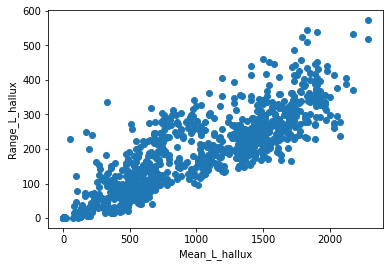

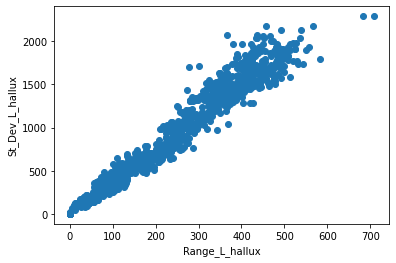

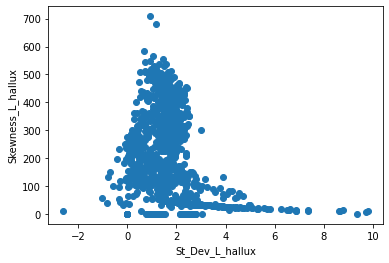

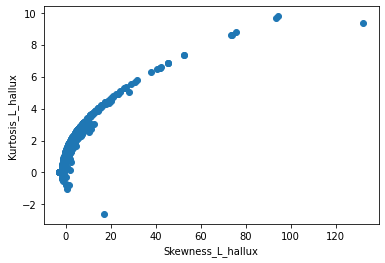

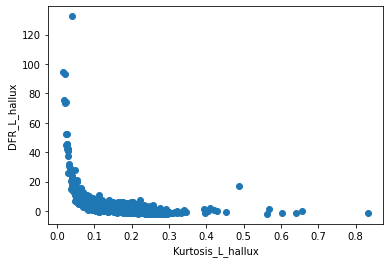

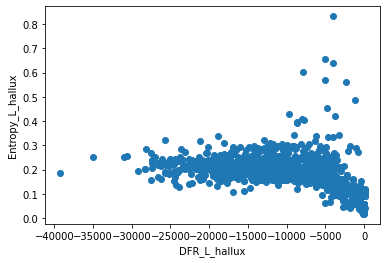

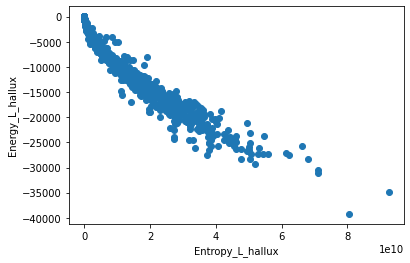

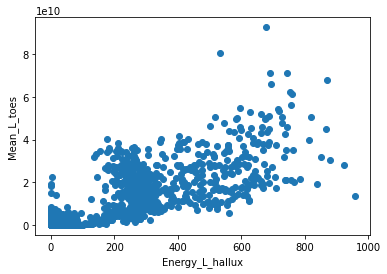

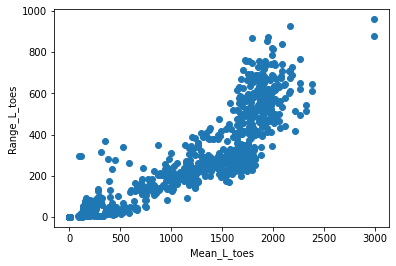

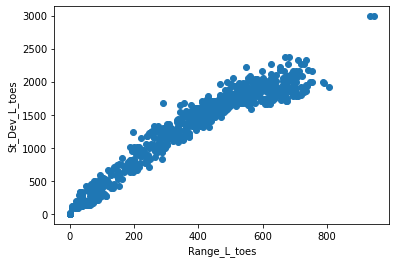

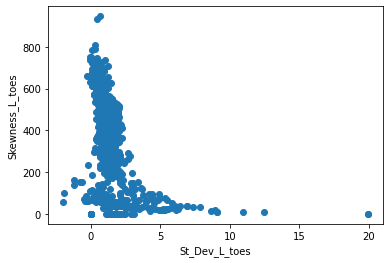

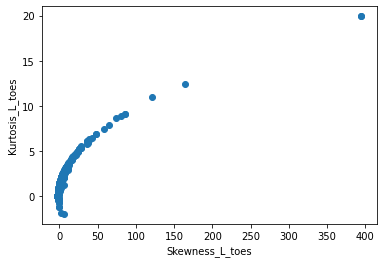

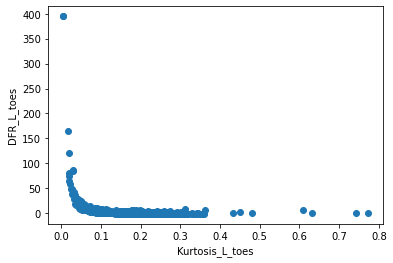

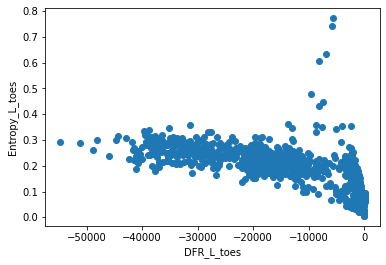

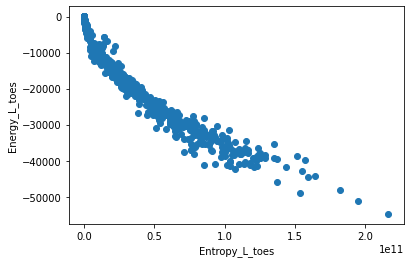

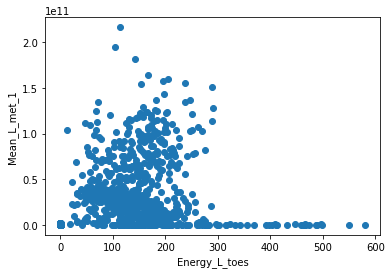

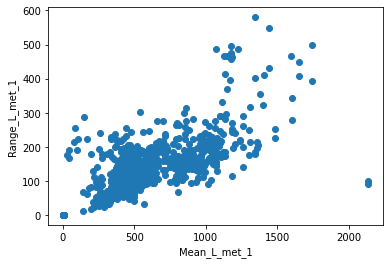

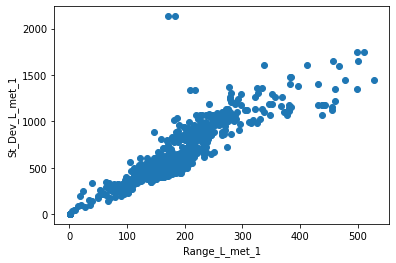

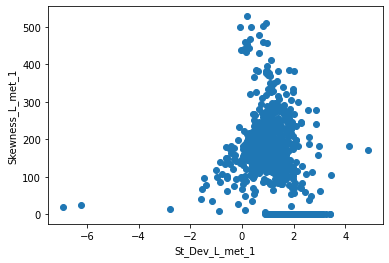

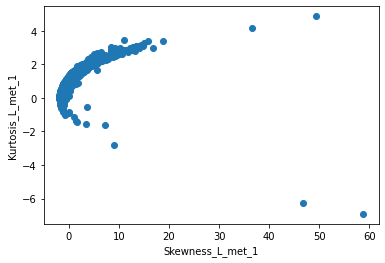

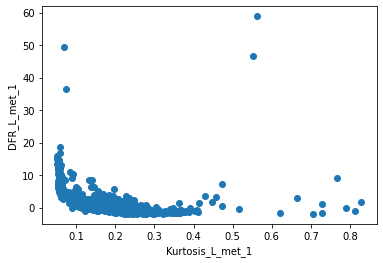

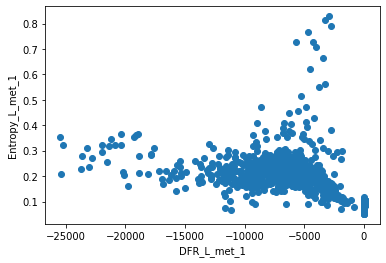

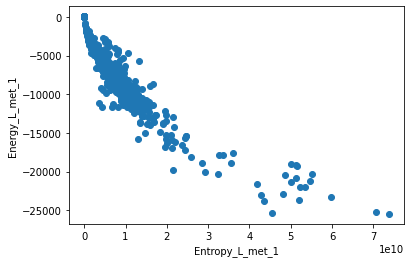

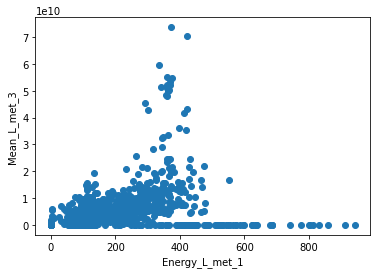

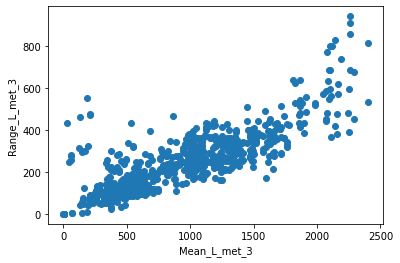

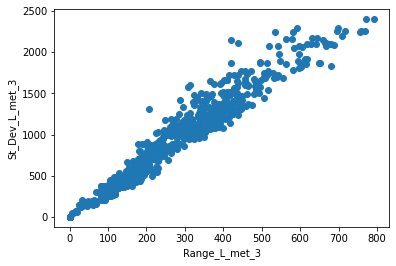

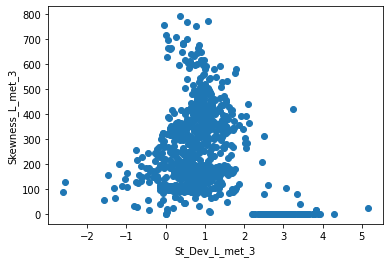

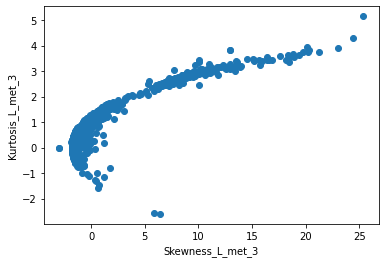

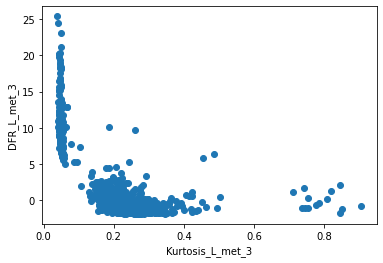

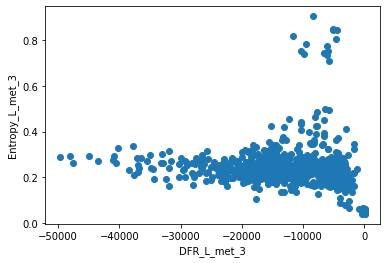

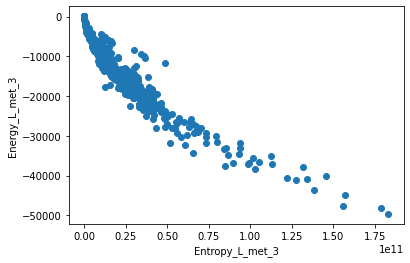

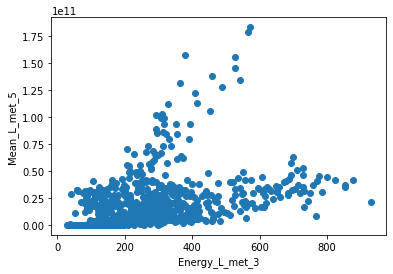

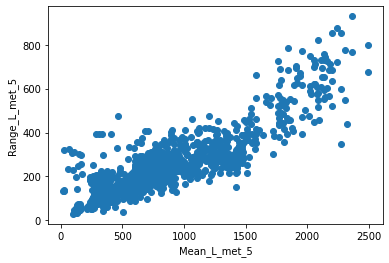

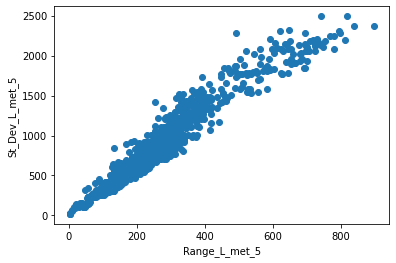

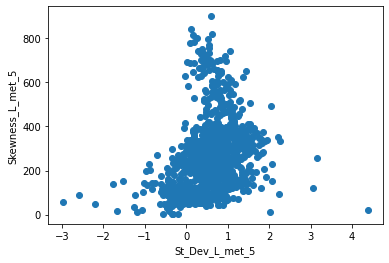

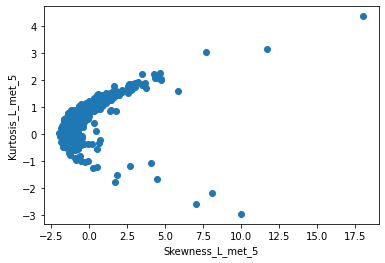

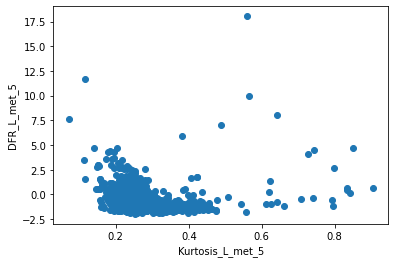

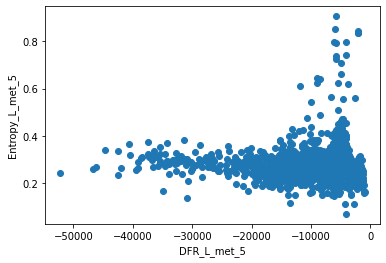

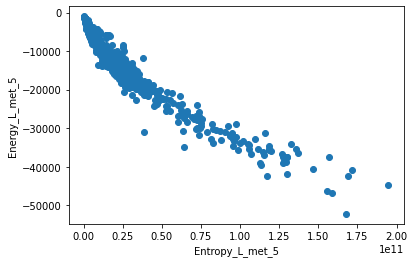

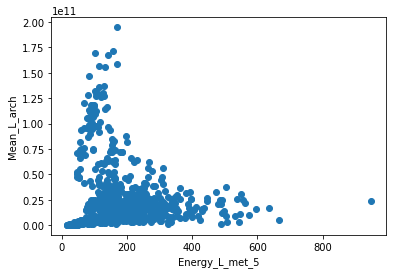

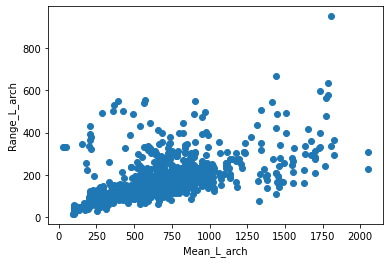

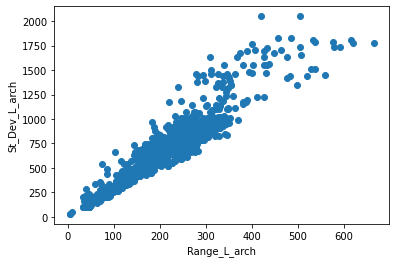

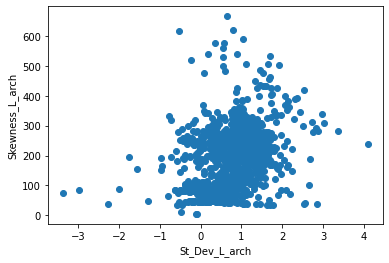

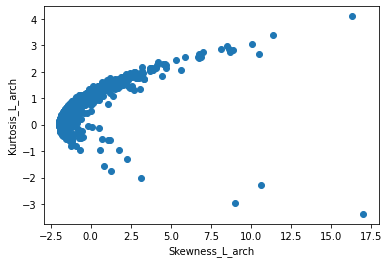

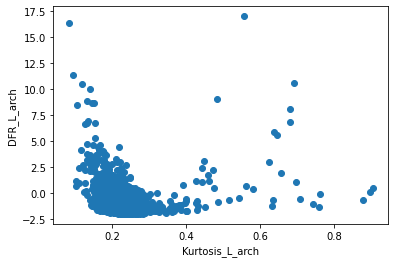

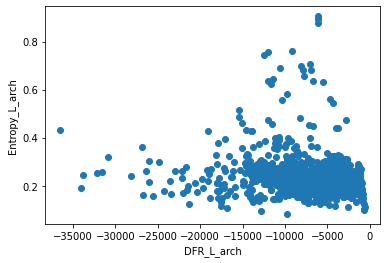

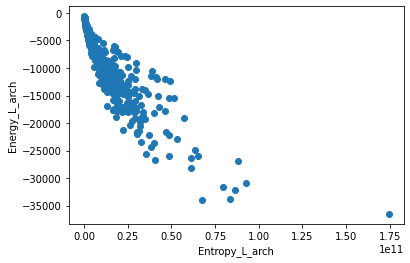

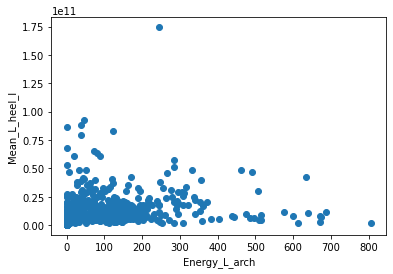

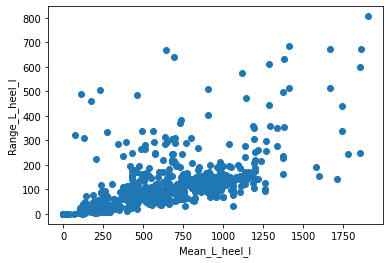

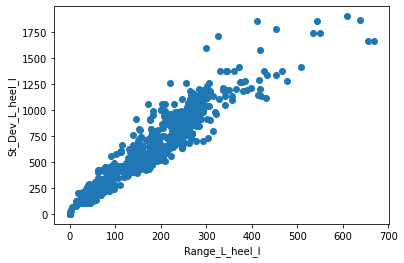

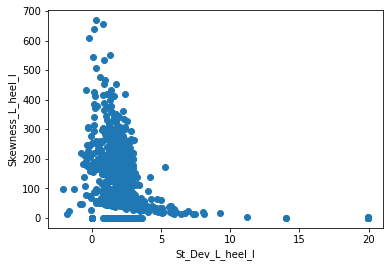

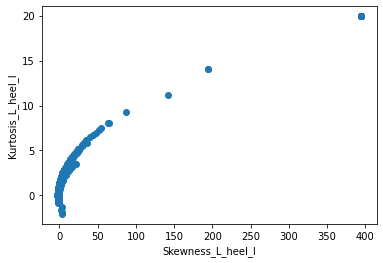

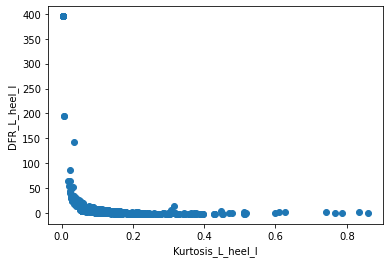

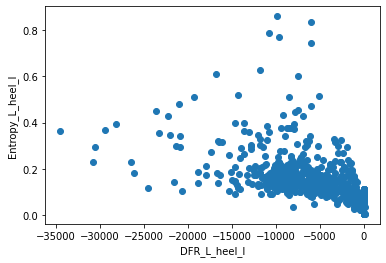

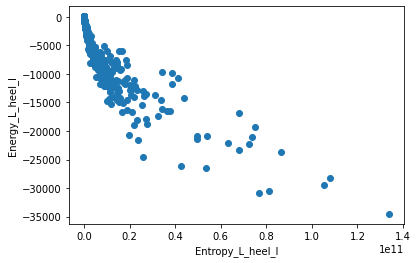

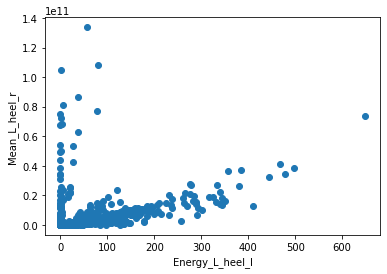

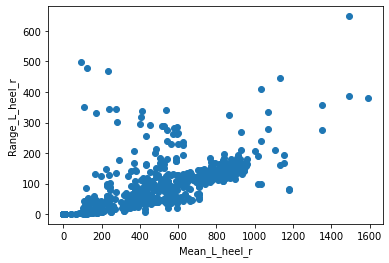

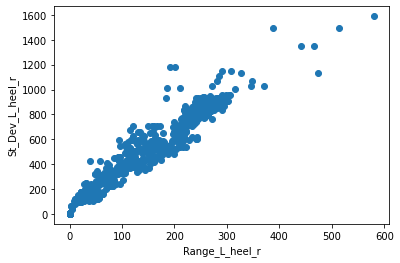

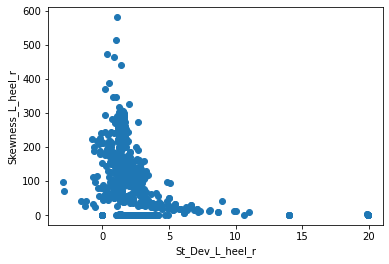

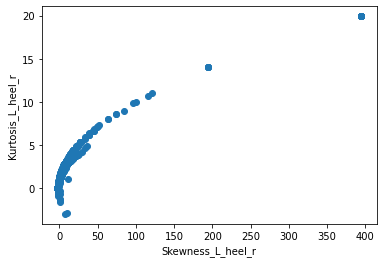

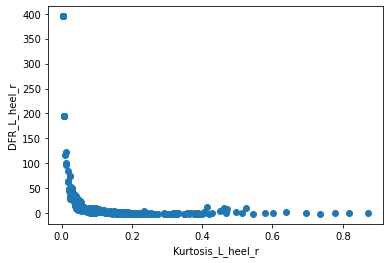

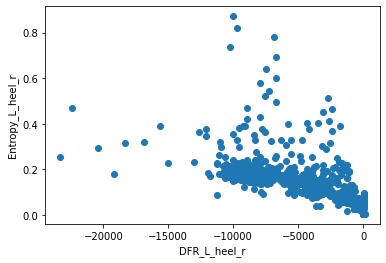

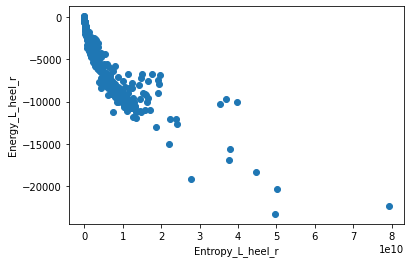

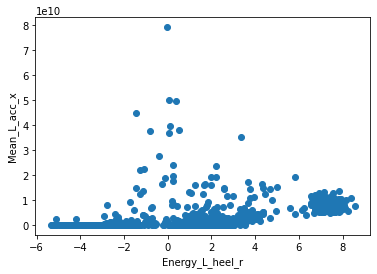

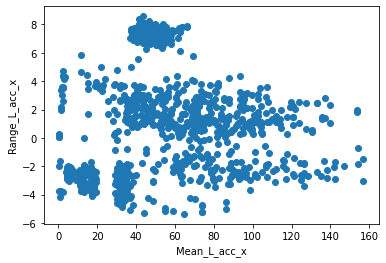

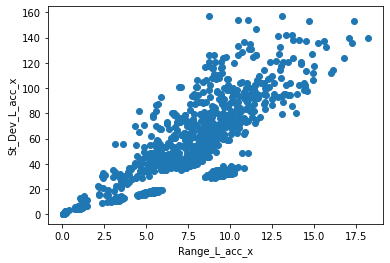

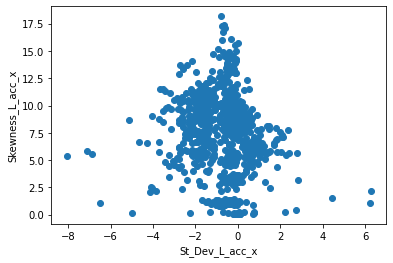

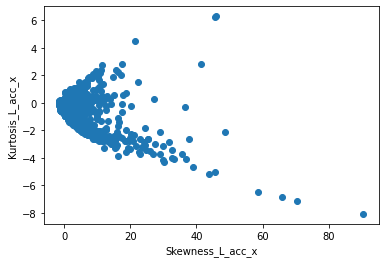

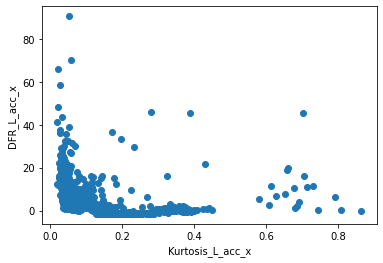

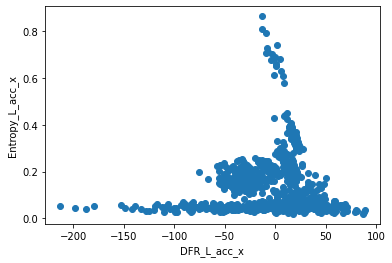

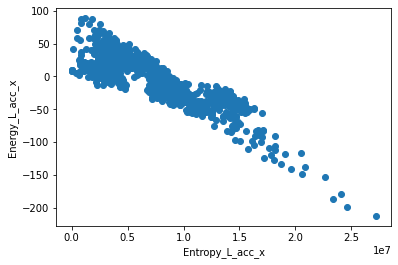

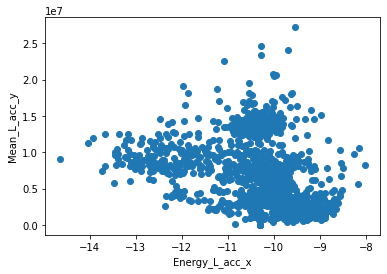

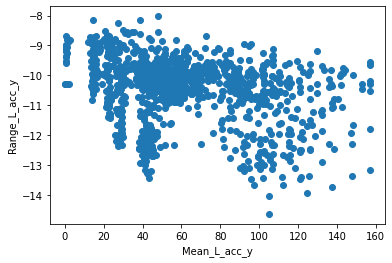

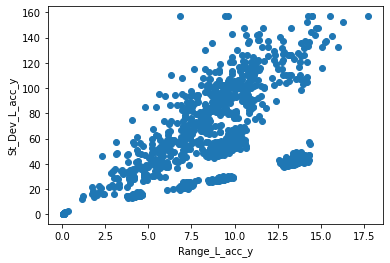

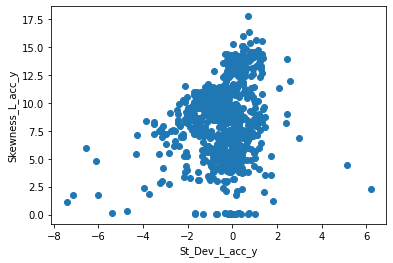

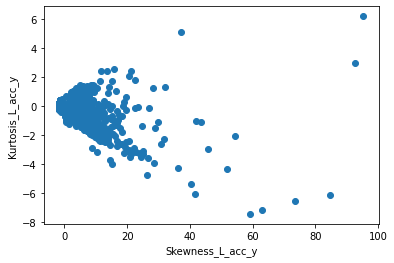

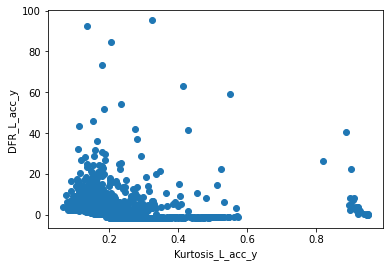

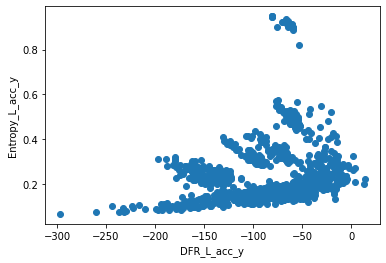

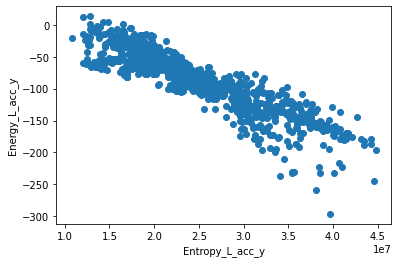

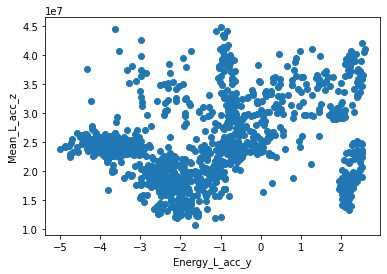

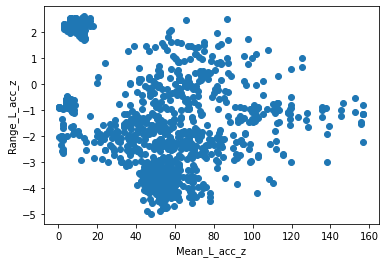

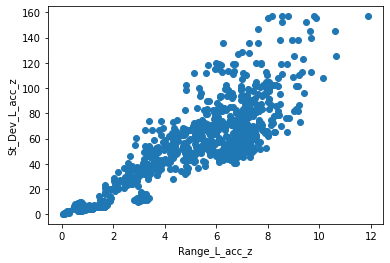

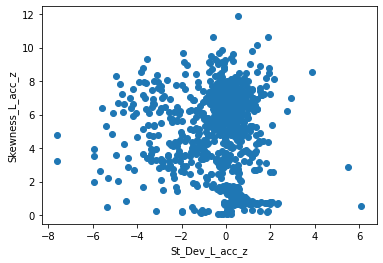

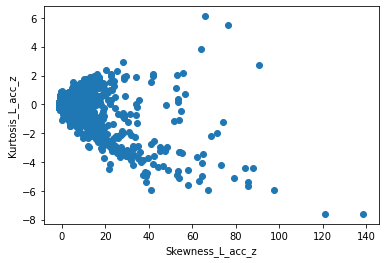

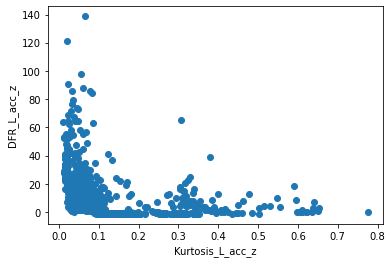

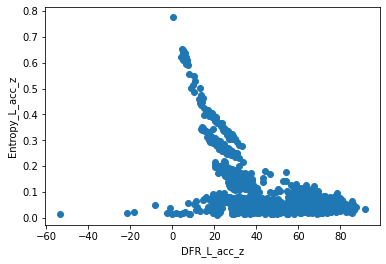

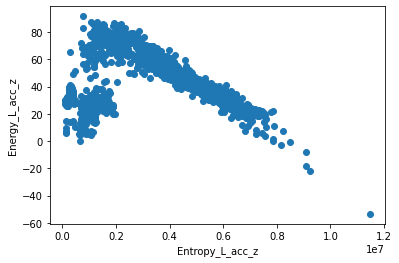

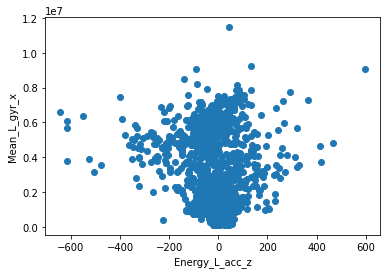

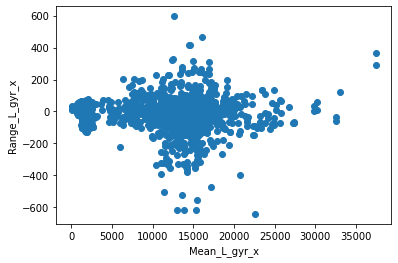

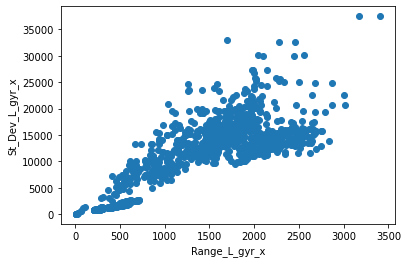

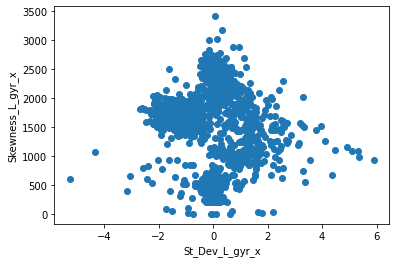

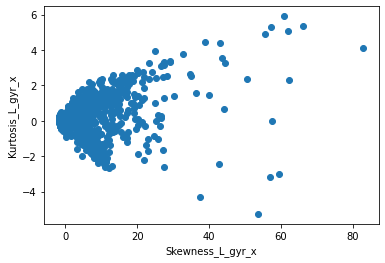

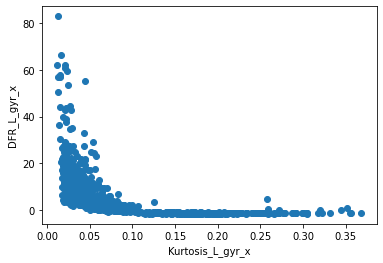

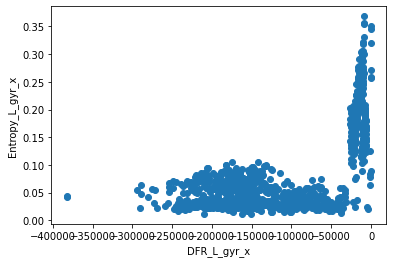

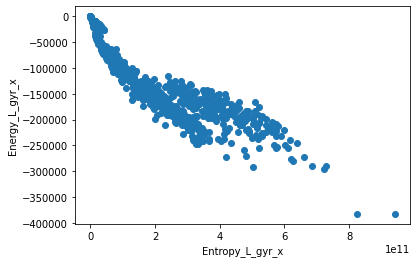

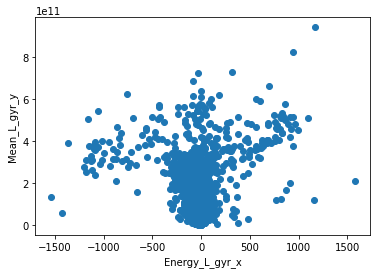

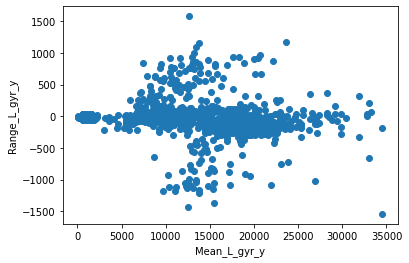

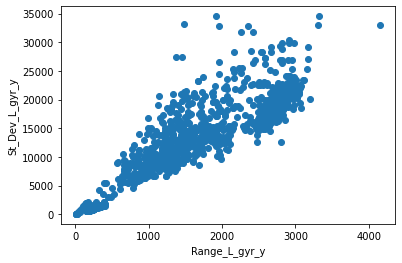

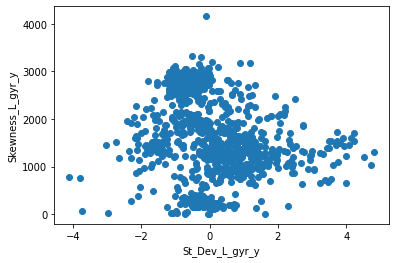

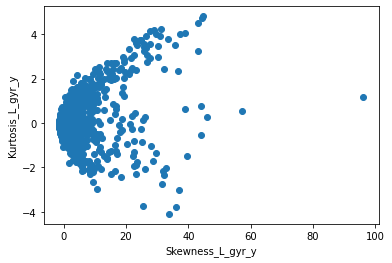

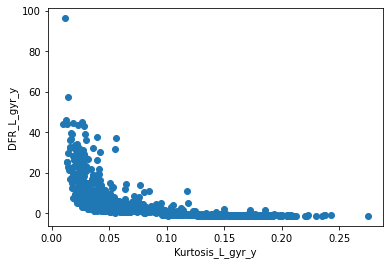

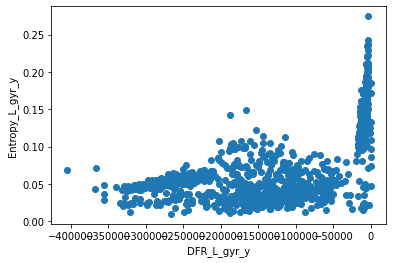

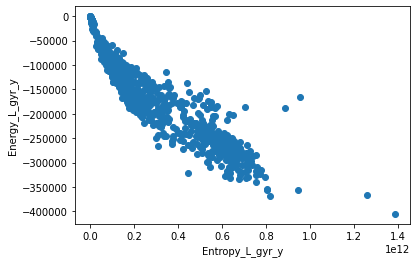

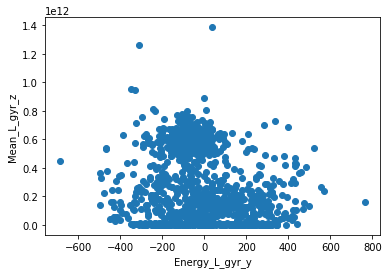

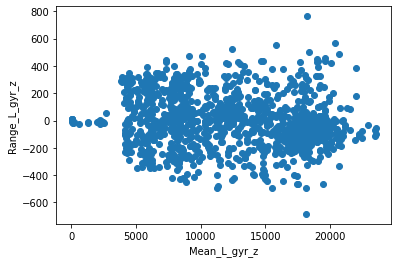

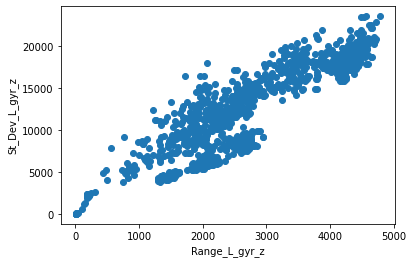

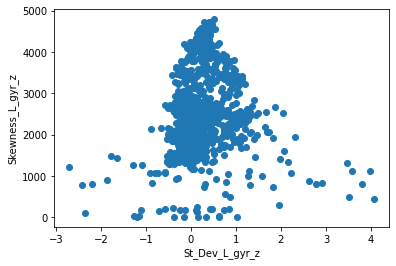

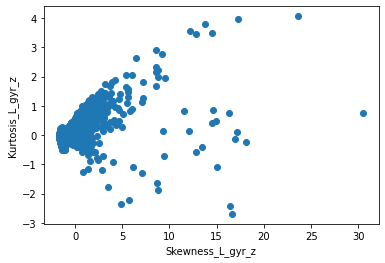

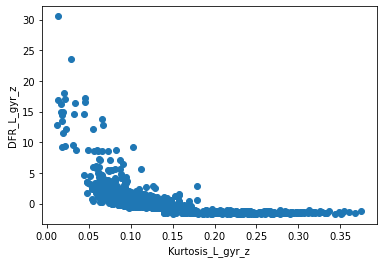

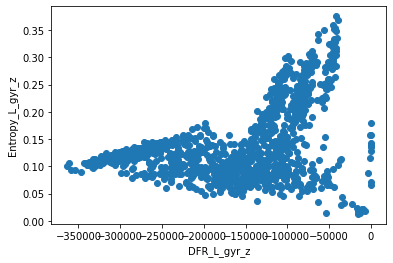

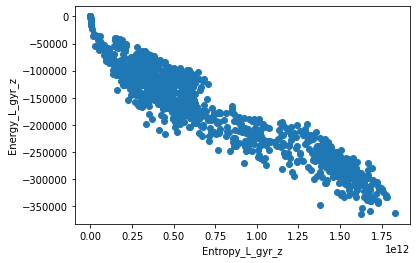

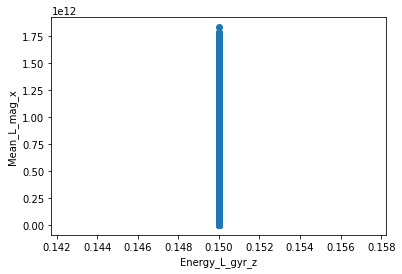

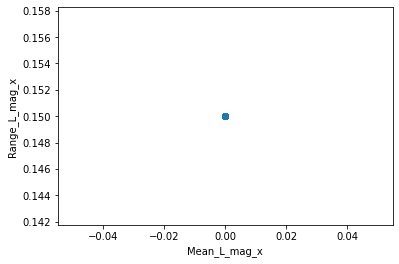

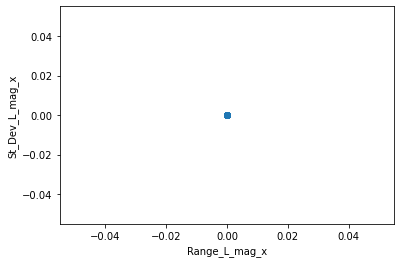

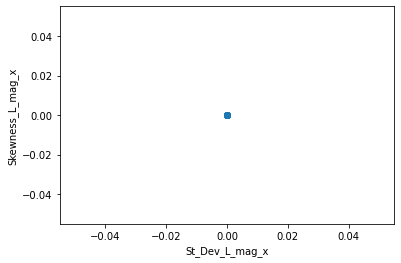

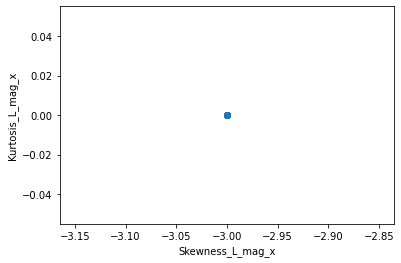

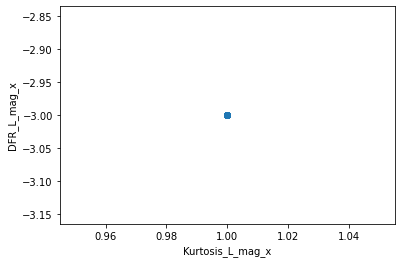

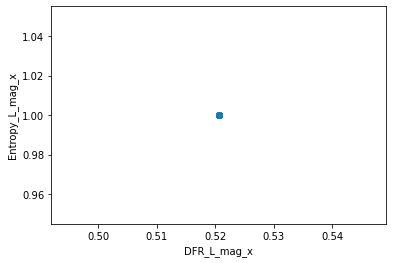

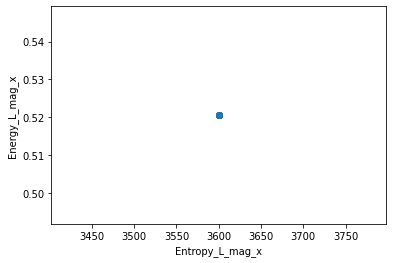

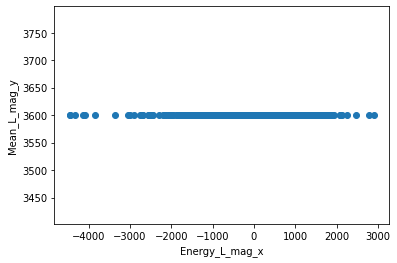

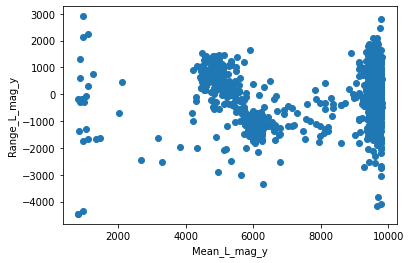

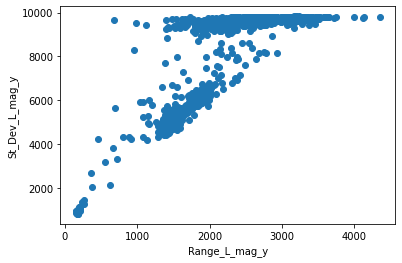

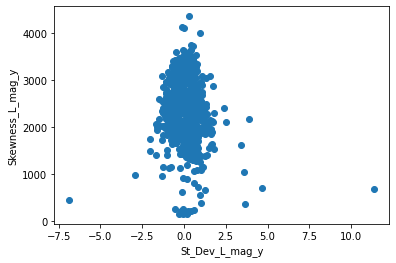

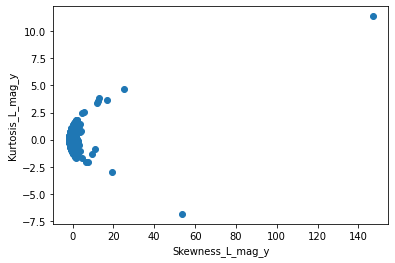

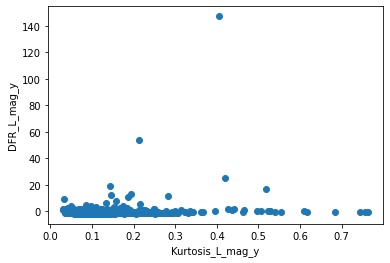

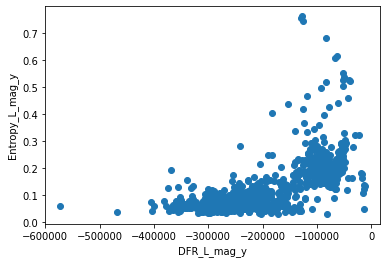

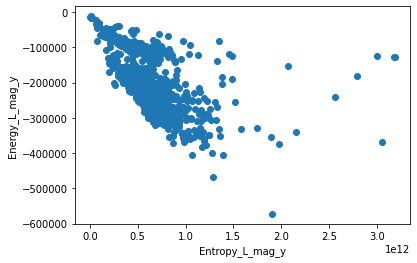

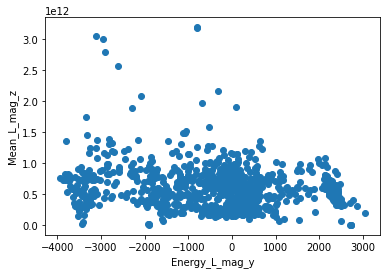

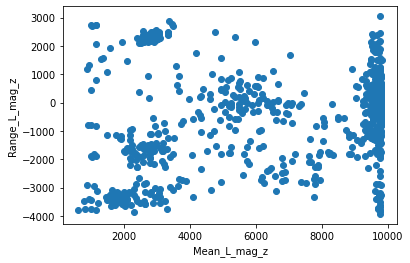

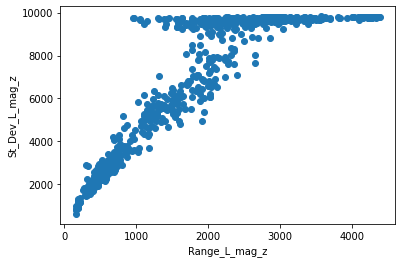

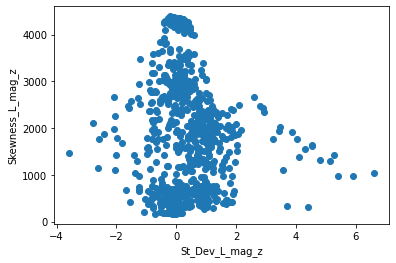

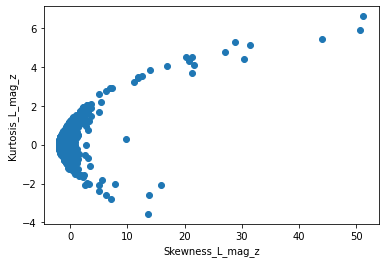

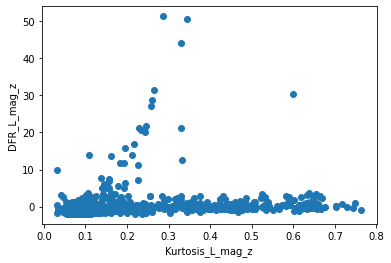

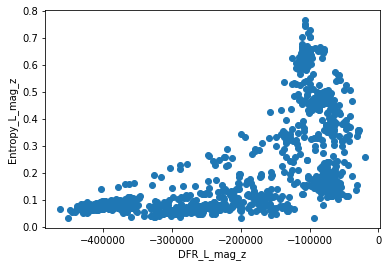

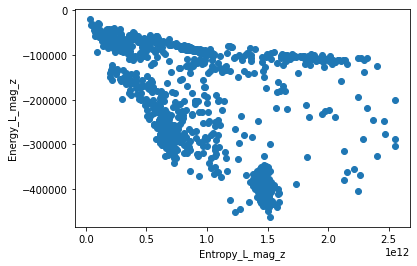

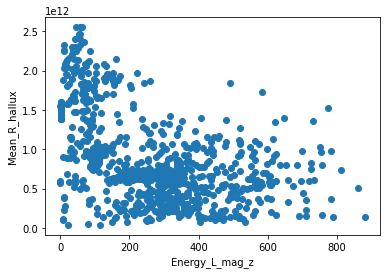

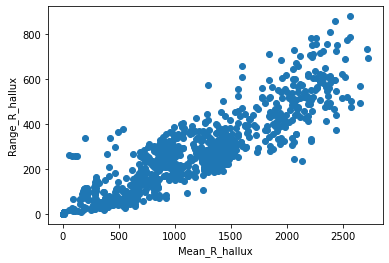

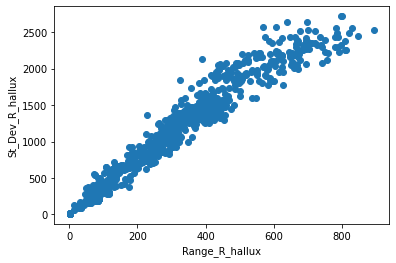

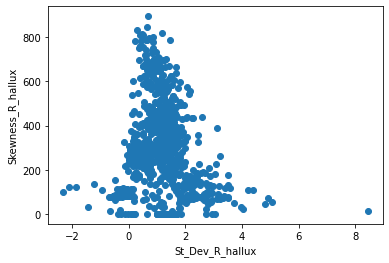

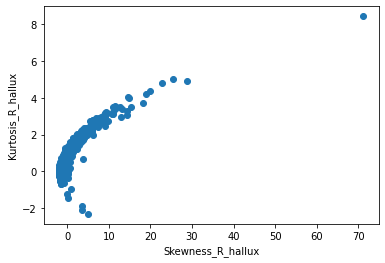

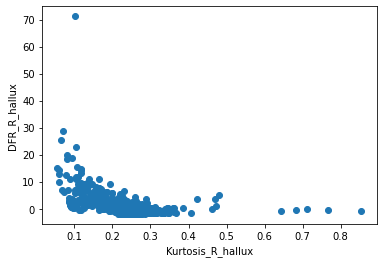

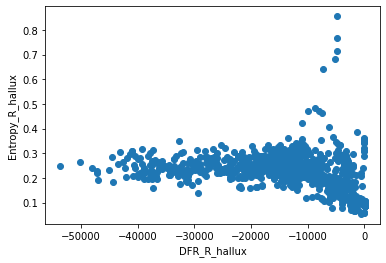

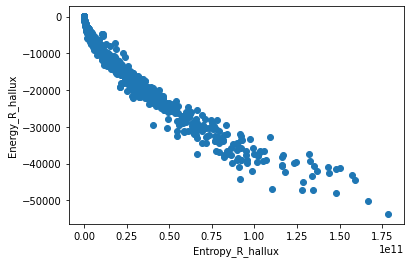

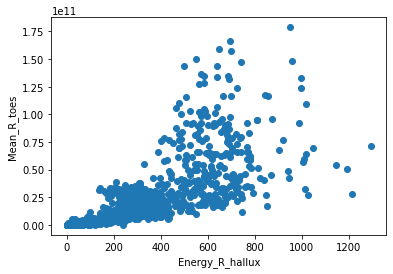

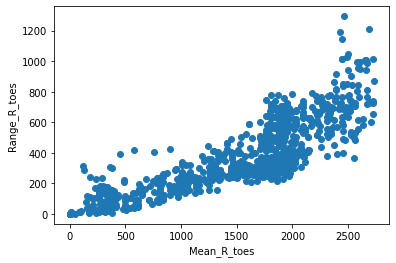

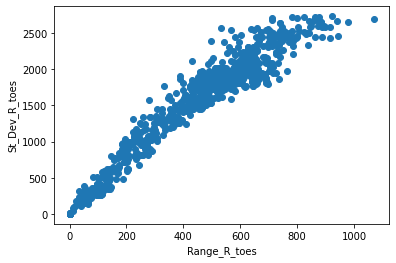

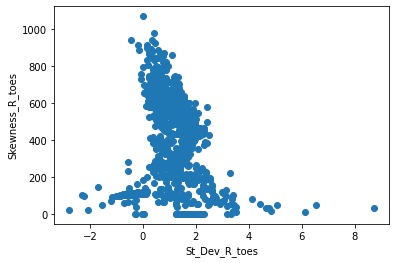

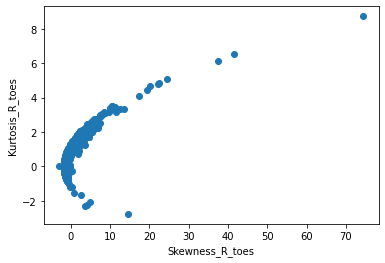

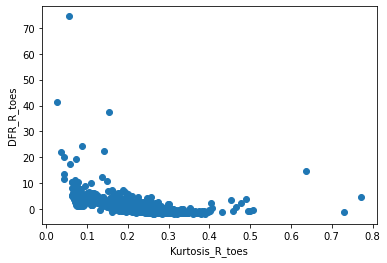

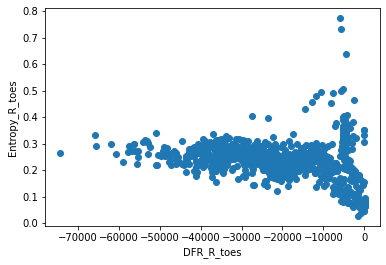

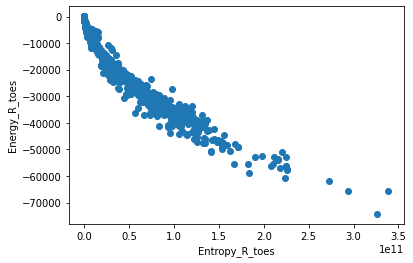

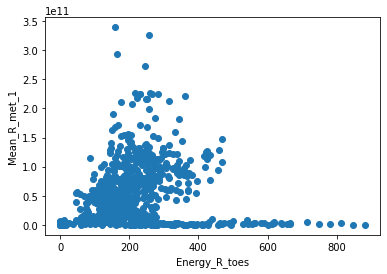

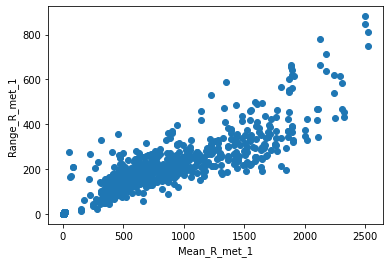

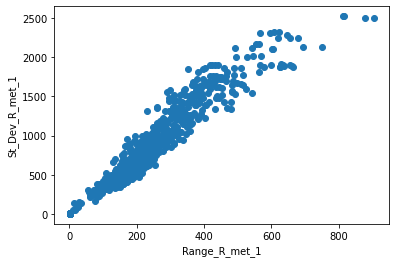

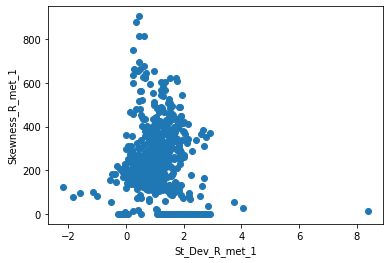

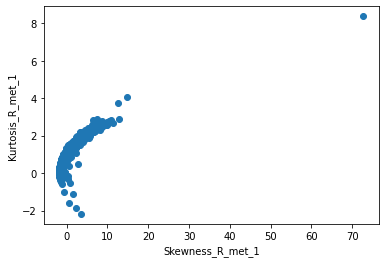

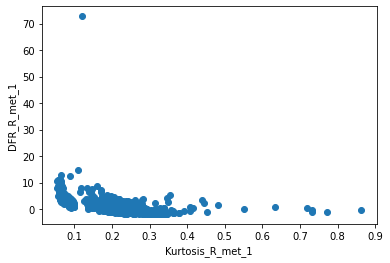

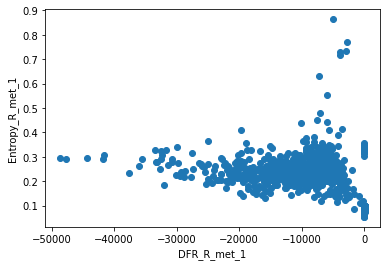

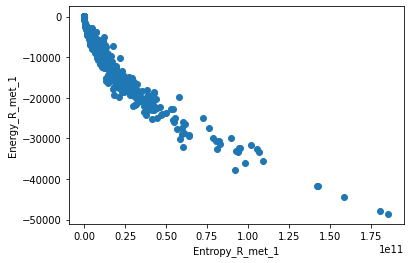

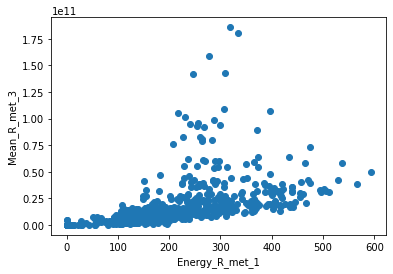

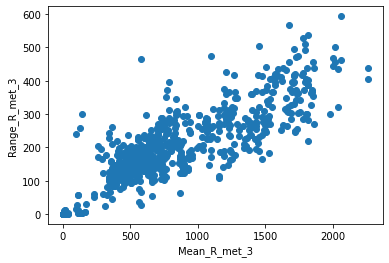

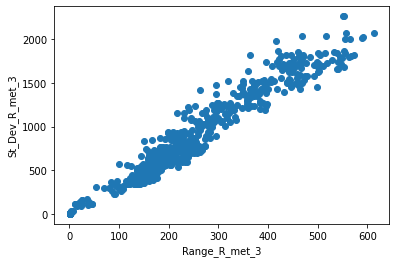

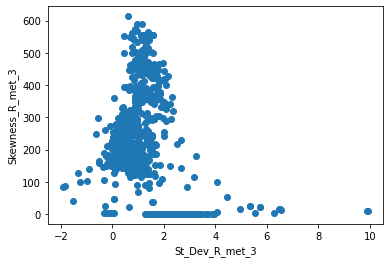

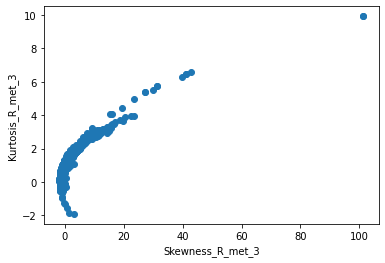

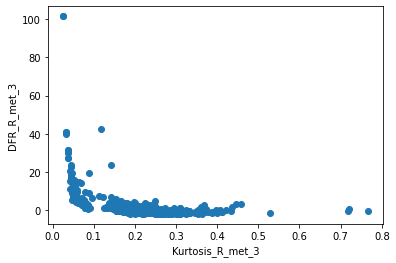

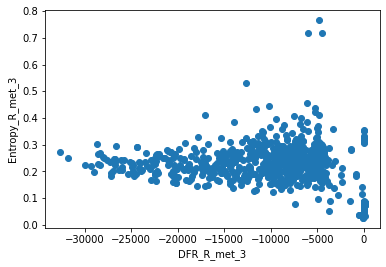

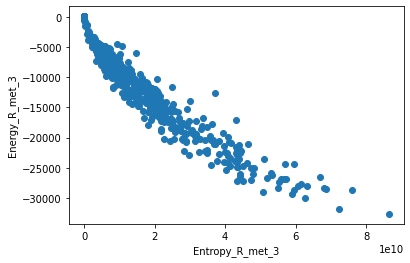

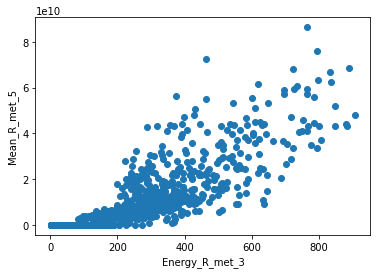

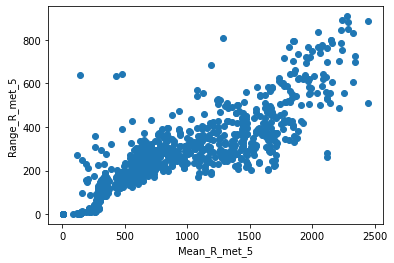

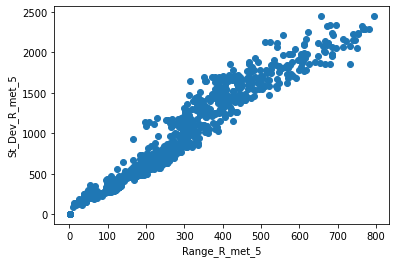

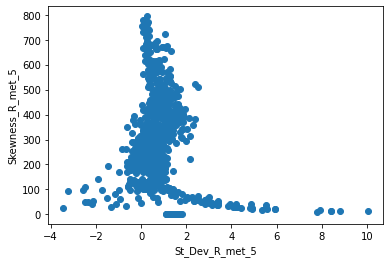

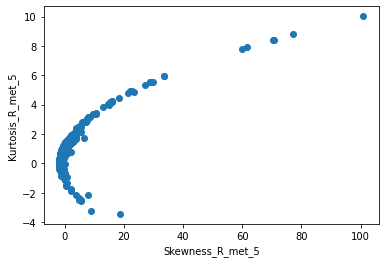

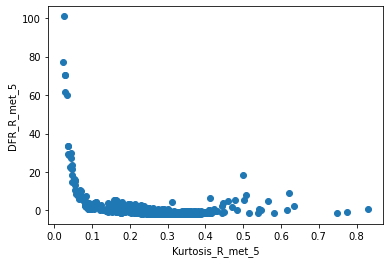

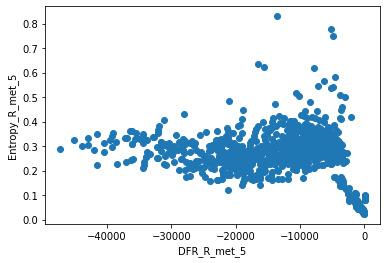

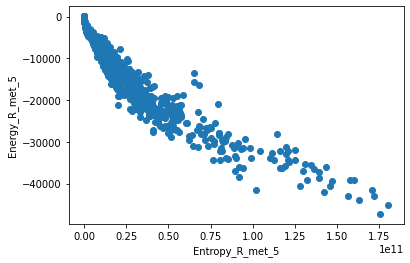

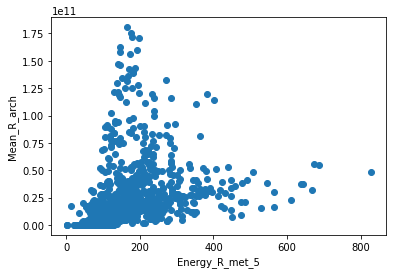

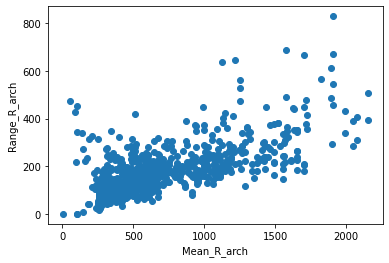

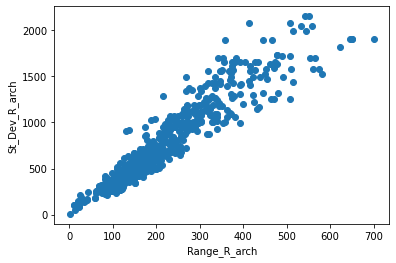

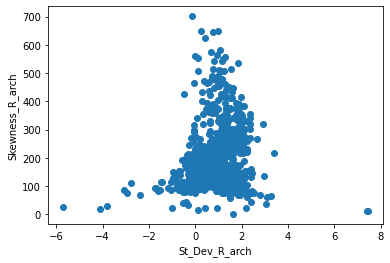

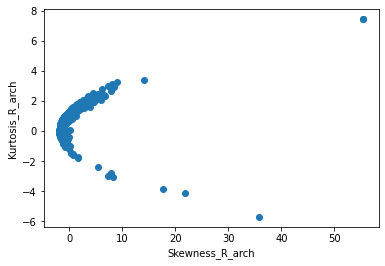

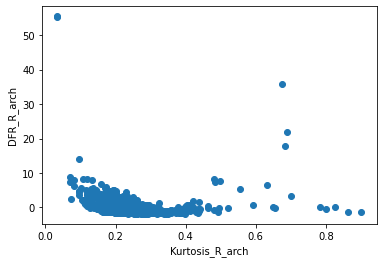

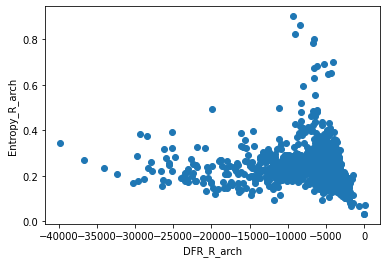

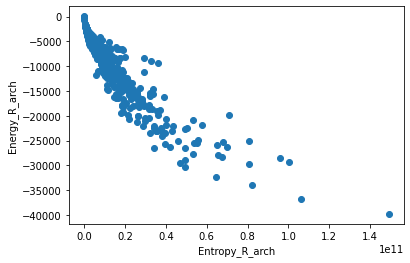

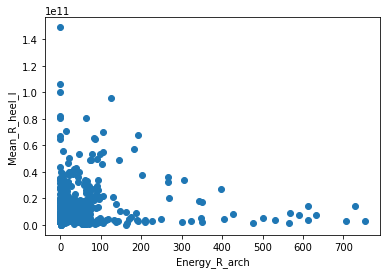

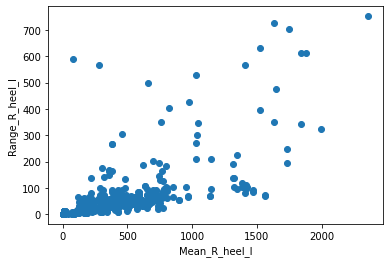

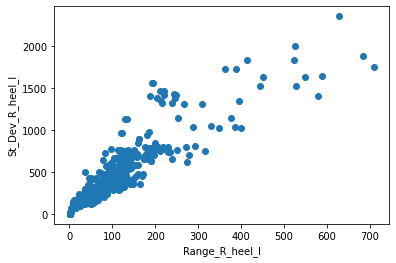

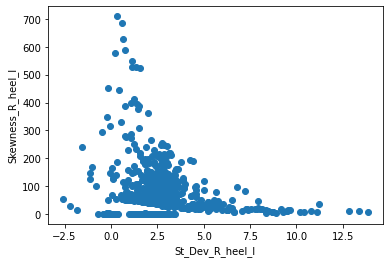

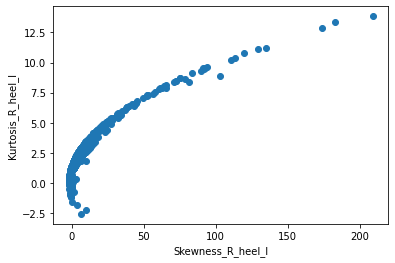

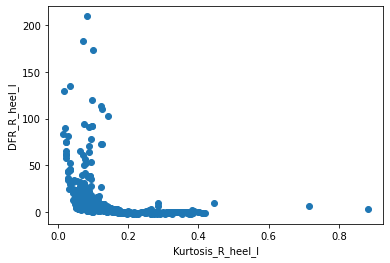

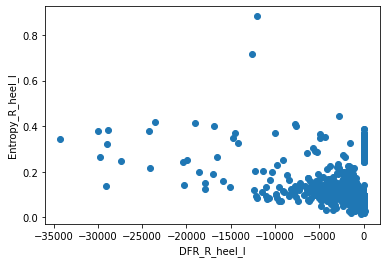

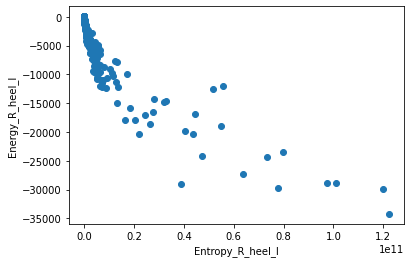

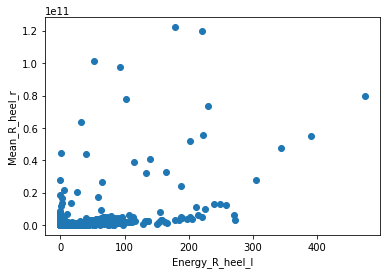

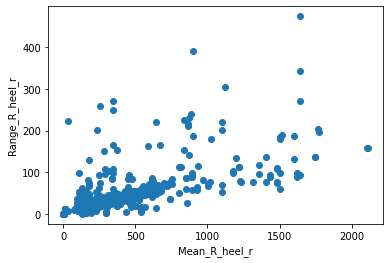

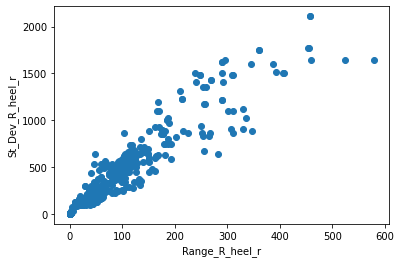

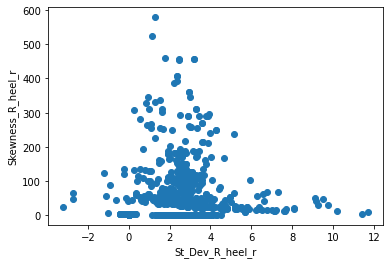

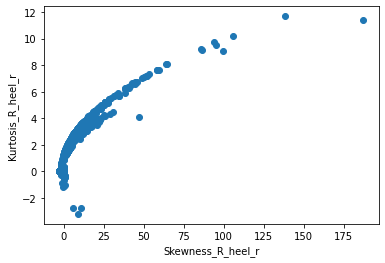

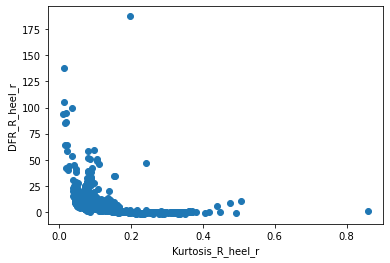

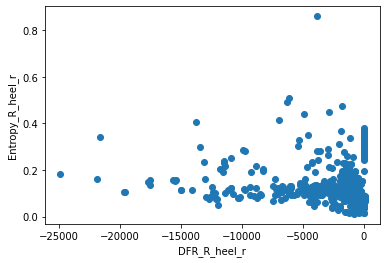

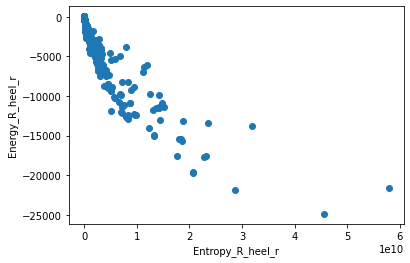

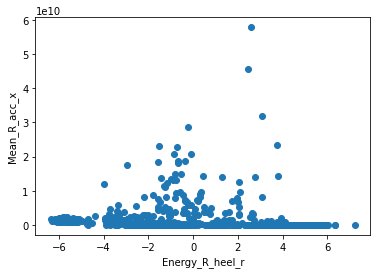

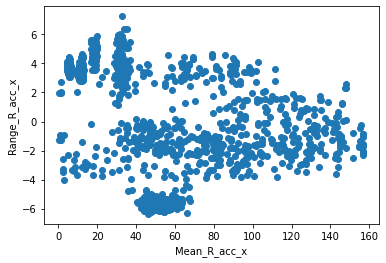

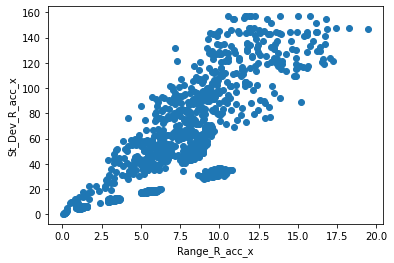

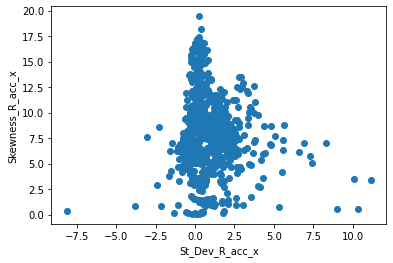

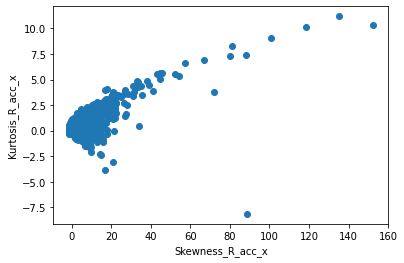

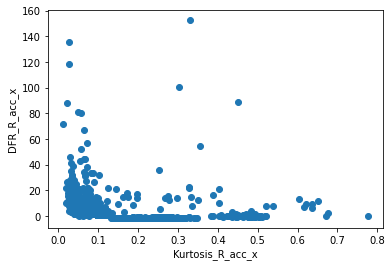

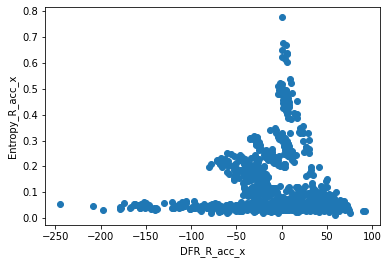

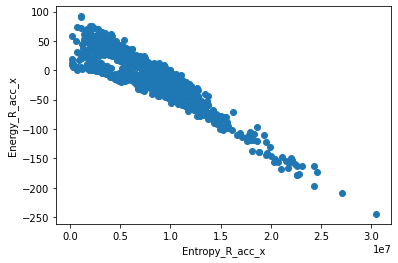

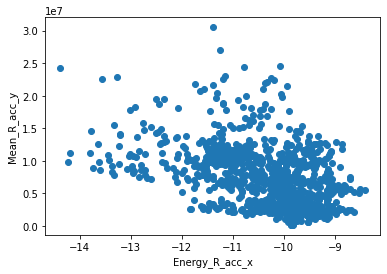

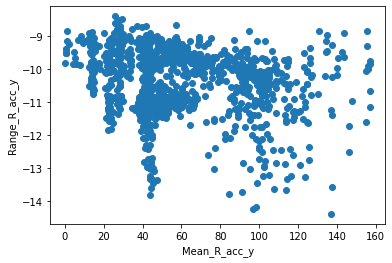

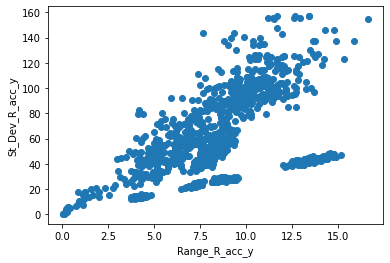

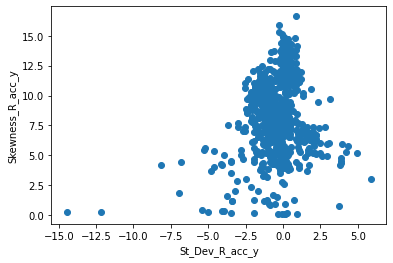

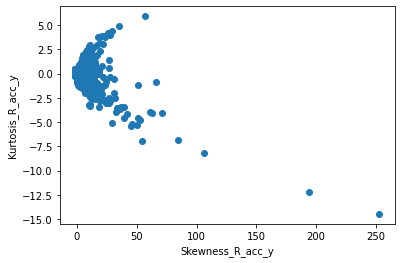

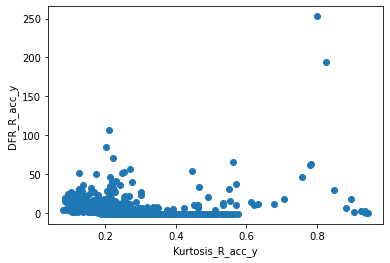

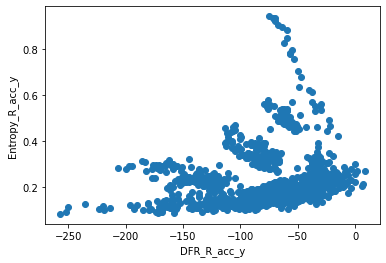

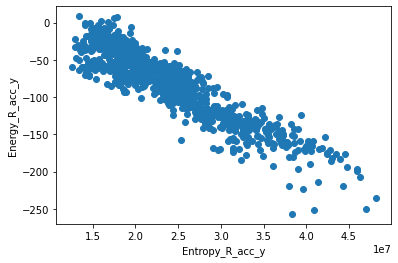

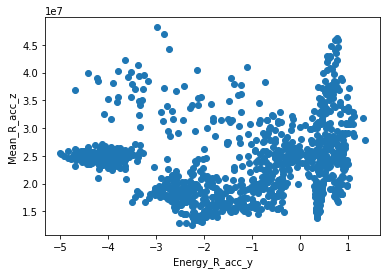

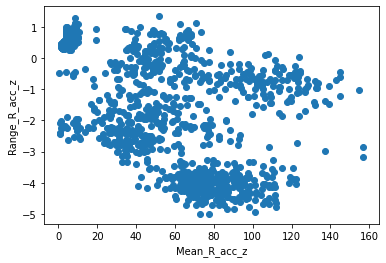

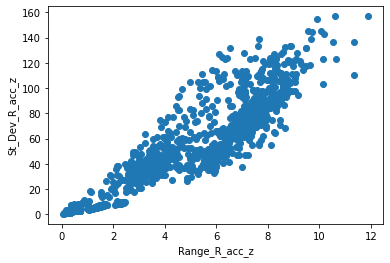

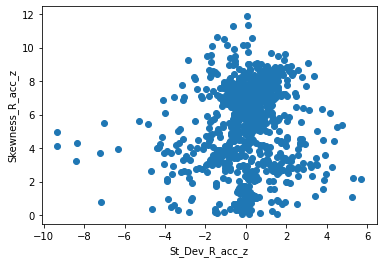

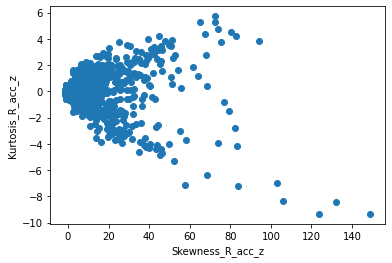

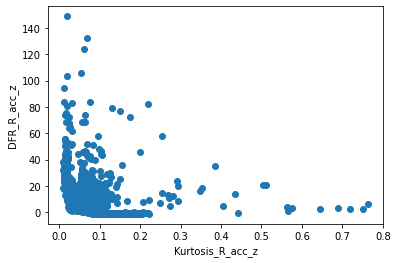

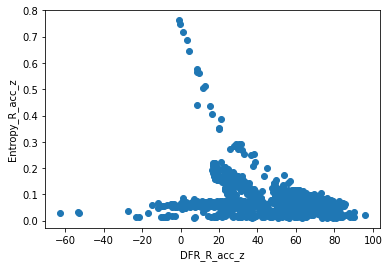

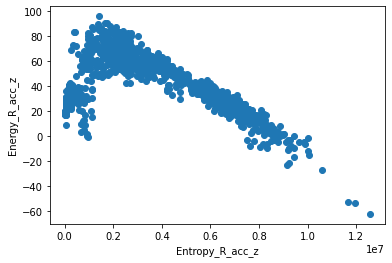

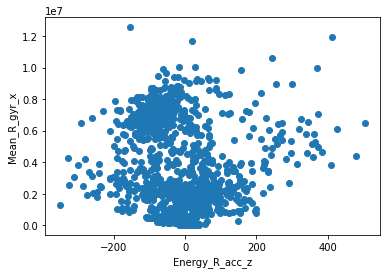

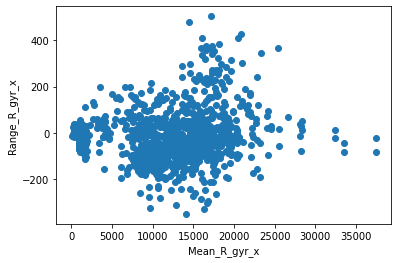

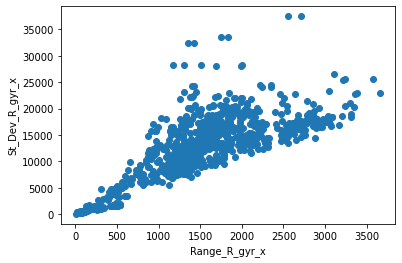

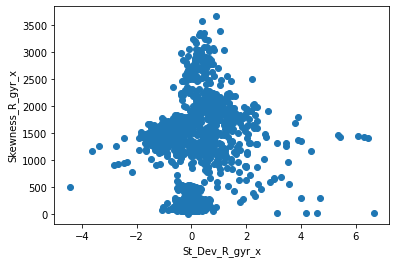

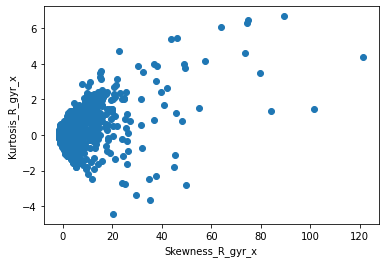

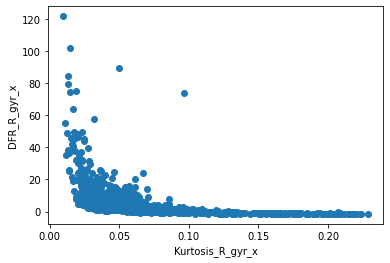

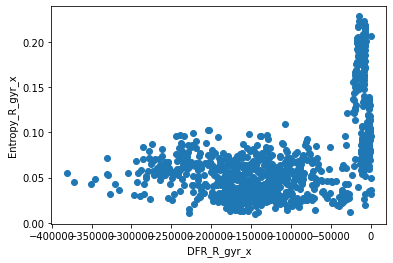

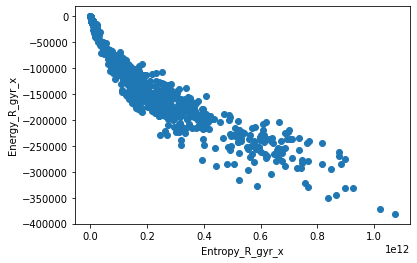

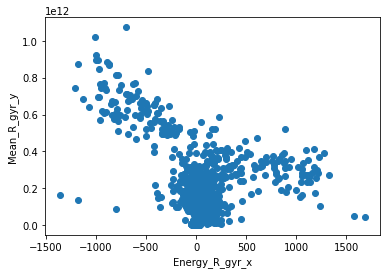

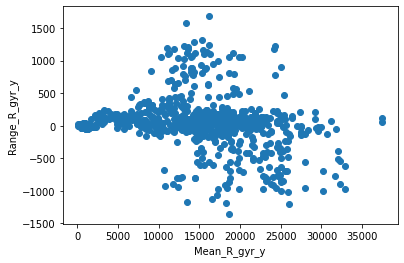

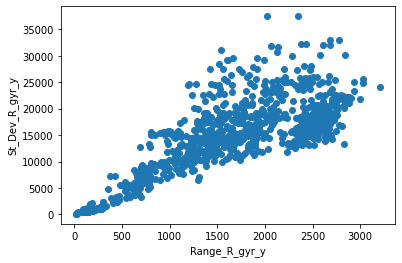

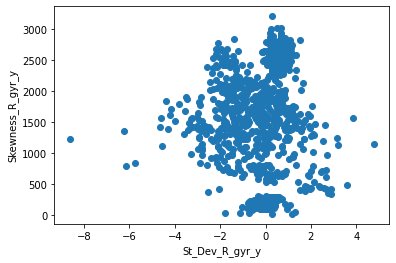

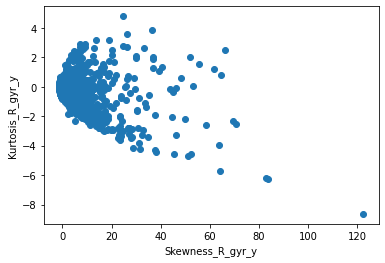

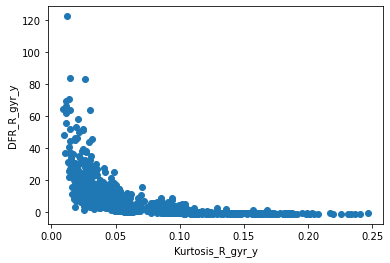

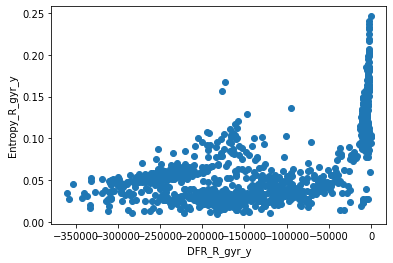

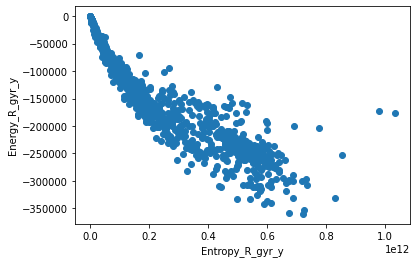

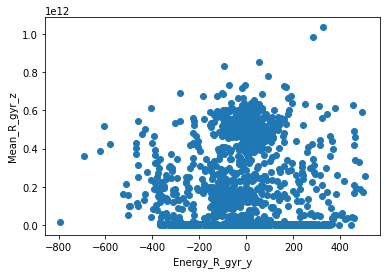

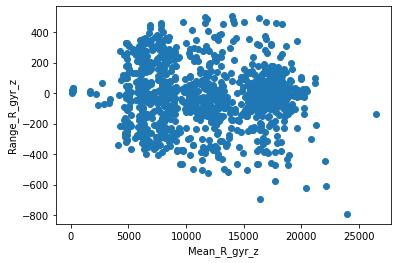

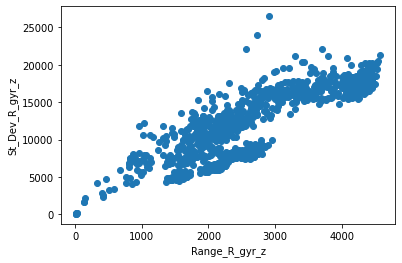

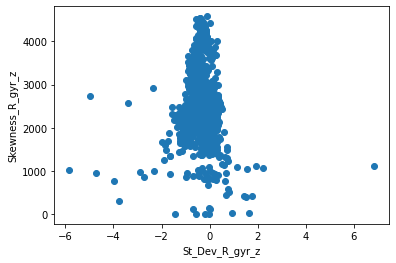

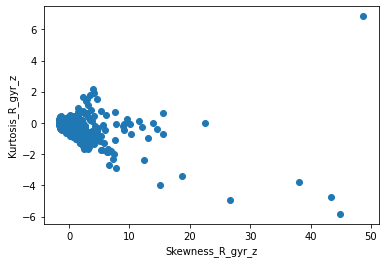

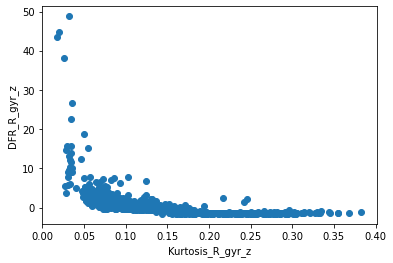

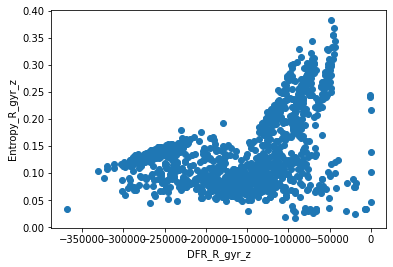

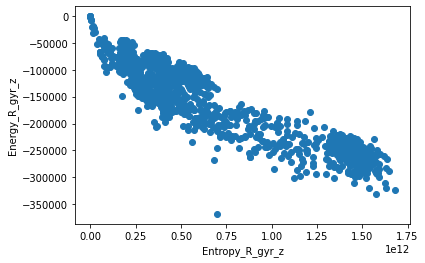

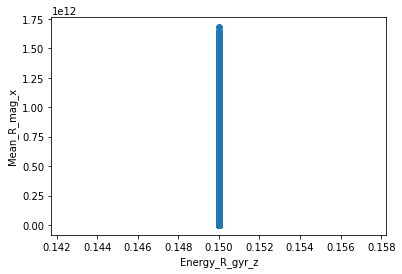

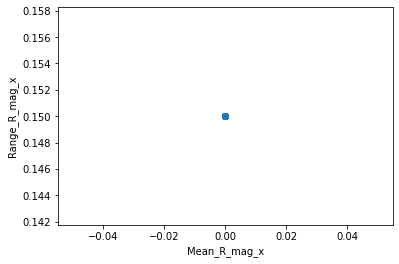

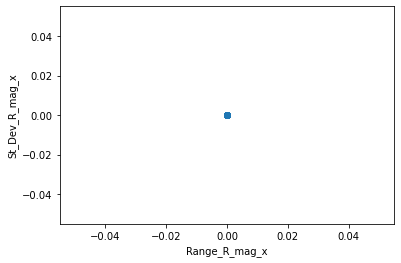

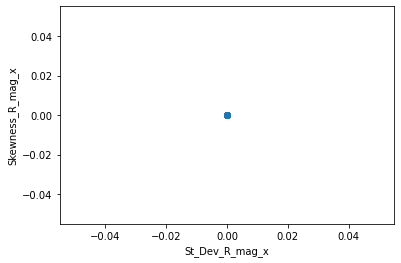

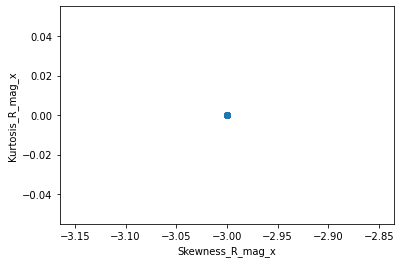

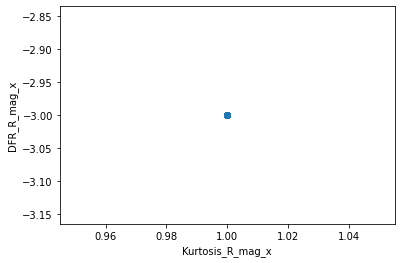

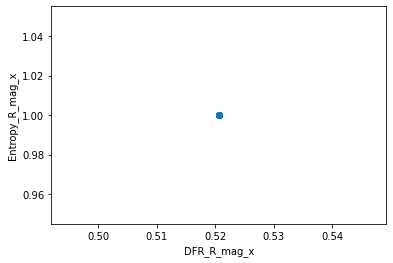

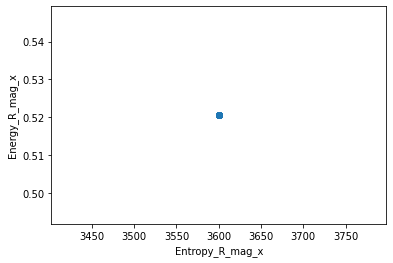

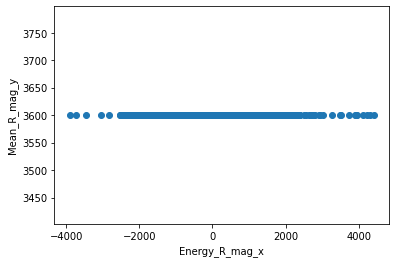

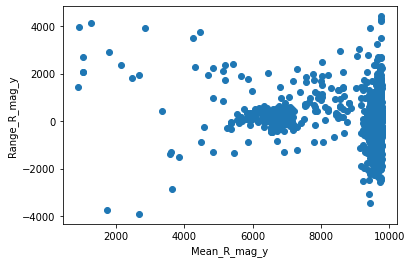

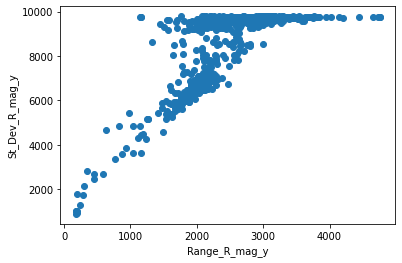

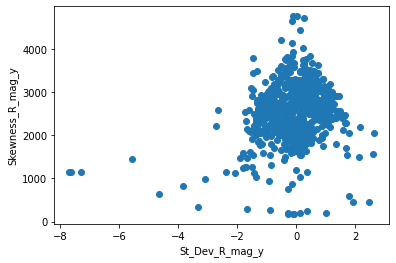

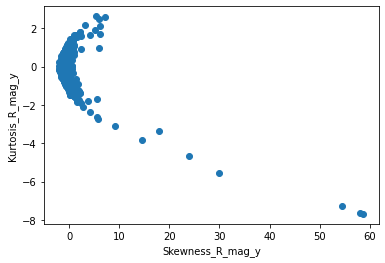

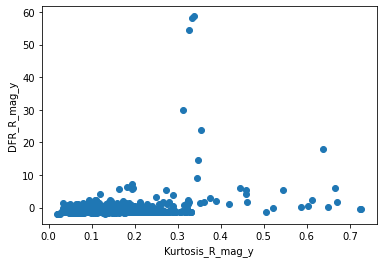

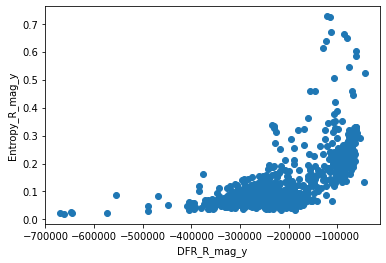

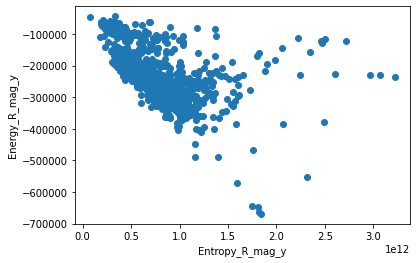

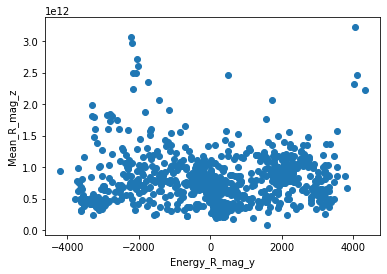

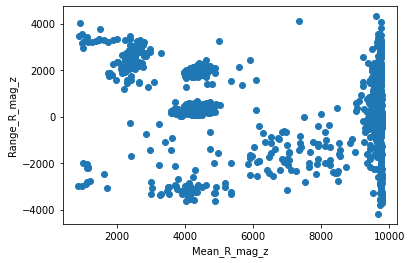

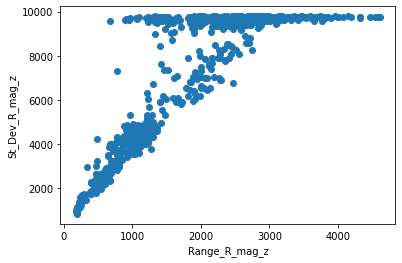

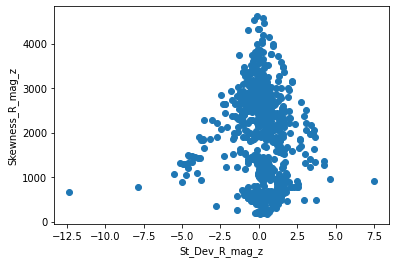

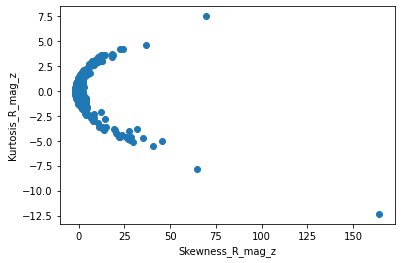

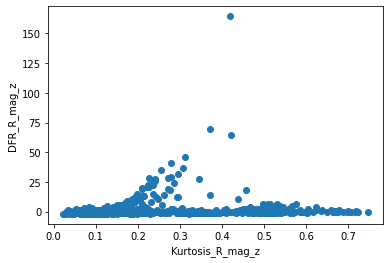

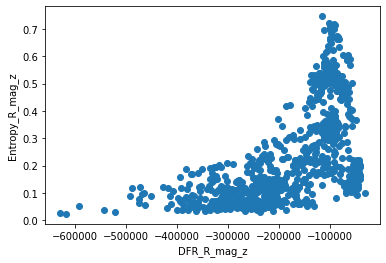

In [1479]:
plot_L(Data.iloc[:,:-2], Data.iloc[:,1:-1])

In [1540]:
df = Data
d =rmv_ls(df)
df.loc[:,d]

['Mean_L_mag_x', 'Range_L_mag_x', 'St_Dev_L_mag_x', 'Skewness_L_mag_x', 'Kurtosis_L_mag_x', 'DFR_L_mag_x', 'Entropy_L_mag_x', 'Energy_L_mag_x', 'Mean_R_mag_x', 'Range_R_mag_x', 'St_Dev_R_mag_x', 'Skewness_R_mag_x', 'Kurtosis_R_mag_x', 'DFR_R_mag_x', 'Entropy_R_mag_x', 'Energy_R_mag_x']


Mean_L_mag_x  Range_L_mag_x  St_Dev_L_mag_x  Skewness_L_mag_x  \
0             0.15            0.0             0.0               0.0   
1             0.15            0.0             0.0               0.0   
2             0.15            0.0             0.0               0.0   
3             0.15            0.0             0.0               0.0   
4             0.15            0.0             0.0               0.0   
...            ...            ...             ...               ...   
1195          0.15            0.0             0.0               0.0   
1196          0.15            0.0             0.0               0.0   
1197          0.15            0.0             0.0               0.0   
1198          0.15            0.0             0.0               0.0   
1199          0.15            0.0             0.0               0.0   

      Kurtosis_L_mag_x  DFR_L_mag_x  Entropy_L_mag_x  Energy_L_mag_x  \
0                 -3.0          1.0           0.5206          3600.0   
1                 -3.0          1.0           0.5206          3600.0   
2                 -3.0          1.0           0.5206          3600.0   
3                 -3.0          1.0           0.5206          3600.0   
4                 -3.0          1.0           0.5206          3600.0   
...                ...          ...              ...             ...   
1195              -3.0          1.0           0.5206          3600.0   
1196              -3.0          1.0           0.5206          3600.0   
1197              -3.0          1.0           0.5206          3600.0   
1198              -3.0          1.0           0.5206          3600.0   
1199              -3.0          1.0           0.5206          3600.0   

      Mean_R_mag_x  Range_R_mag_x  St_Dev_R_mag_x  Skewness_R_mag_x  \
0             0.15            0.0             0.0               0.0   
1             0.15            0.0             0.0               0.0   
2             0.15            0.0             0.0               0.0   
3             0.15            0.0             0.0               0.0   
4             0.15            0.0             0.0               0.0   
...            ...            ...             ...               ...   
1195          0.15            0.0             0.0               0.0   
1196          0.15            0.0             0.0               0.0   
1197          0.15            0.0             0.0               0.0   
1198          0.15            0.0             0.0               0.0   
1199          0.15            0.0             0.0               0.0   

      Kurtosis_R_mag_x  DFR_R_mag_x  Entropy_R_mag_x  Energy_R_mag_x  
0                 -3.0          1.0           0.5206          3600.0  
1                 -3.0          1.0           0.5206          3600.0  
2                 -3.0          1.0           0.5206          3600.0  
3                 -3.0          1.0           0.5206          3600.0  
4                 -3.0          1.0           0.5206          3600.0  
...                ...          ...              ...             ...  
1195              -3.0          1.0           0.5206          3600.0  
1196              -3.0          1.0           0.5206          3600.0  
1197              -3.0          1.0           0.5206          3600.0  
1198              -3.0          1.0           0.5206          3600.0  
1199              -3.0          1.0           0.5206          3600.0  

[1200 rows x 16 columns]

In [1541]:
df = df.drop(d,axis = 1)

In [1542]:
df

Mean_L_hallux  Range_L_hallux  St_Dev_L_hallux  Skewness_L_hallux  \
0          117.5125           558.0       192.587460           1.271066   
1          285.1325          1971.0       401.841201           2.244358   
2          313.2925          1971.0       381.109542           2.439065   
3          434.2375          1827.0       469.269182           1.121957   
4          544.0150          1827.0       509.326510           0.511355   
...             ...             ...              ...                ...   
1195        16.7275           132.0        41.550504           2.160707   
1196        11.9650           131.0        35.589751           2.741499   
1197         9.6675           128.0        31.223215           3.083986   
1198        11.6675           128.0        34.012705           2.707855   
1199        16.5275           128.0        40.557571           2.120007   

      Kurtosis_L_hallux  DFR_L_hallux  Entropy_L_hallux  Energy_L_hallux  \
0             -0.034507        0.1783        -6713.7825     5.169266e+09   
1              6.043515        0.1975       -19239.4775     2.589390e+10   
2              7.363269        0.2213       -19343.9062     2.729488e+10   
3              0.400659        0.2205       -26250.3631     4.774304e+10   
4             -0.782151        0.2836       -28204.0649     6.805367e+10   
...                 ...           ...               ...              ...   
1195           2.705326        0.0846         -954.9611     1.825534e+08   
1196           5.563885        0.0666         -751.4789     1.239845e+08   
1197           7.631802        0.0601         -613.5523     9.275006e+07   
1198           5.437852        0.0736         -698.6110     1.140998e+08   
1199           2.530126        0.0905         -881.6714     1.749726e+08   

      Mean_L_toes  Range_L_toes  ...  Energy_R_mag_y  Mean_R_mag_z  \
0        277.9850        1182.0  ...    7.496750e+11   -742.663500   
1        420.2875        1761.0  ...    9.030018e+11  -1038.084000   
2        566.8250        1761.0  ...    1.339132e+12    -73.130250   
3        729.2575        1849.0  ...    7.376860e+11    338.552625   
4        870.6200        1948.0  ...    8.535439e+11   -340.024500   
...           ...           ...  ...             ...           ...   
1195      19.8350         138.0  ...    3.290809e+11    317.647875   
1196      22.5400         138.0  ...    3.434682e+11    272.236500   
1197      23.3450         131.0  ...    3.763346e+11    293.253750   
1198      28.0450         134.0  ...    3.678775e+11    378.217875   
1199      15.7550         134.0  ...    3.462102e+11    507.153000   

      Range_R_mag_z  St_Dev_R_mag_z  Skewness_R_mag_z  Kurtosis_R_mag_z  \
0           2841.75      598.380021         -0.946787          0.388256   
1           9676.80     1541.107858          1.504357          3.399815   
2           9676.80     1926.697832          0.107699         -0.447804   
3           9254.40     1866.520614         -0.332954          0.596910   
4           9638.40     2836.116267          0.133436         -1.230015   
...             ...             ...               ...               ...   
1195        4377.75     1163.692101          0.634335         -0.464264   
1196        4300.95     1123.310678          0.609906         -0.415838   
1197        4262.55     1180.292592          0.534295         -0.736452   
1198        4492.95     1229.547258          0.393128         -0.998344   
1199        4416.15     1290.423788          0.341583         -1.085841   

      DFR_R_mag_z  Entropy_R_mag_z  Energy_R_mag_z          Label  
0          0.2209      -46145.2712    1.168251e+11     downstairs  
1          0.0923     -169453.8976    3.620066e+11     downstairs  
2          0.0746     -163430.8428    2.971493e+11     downstairs  
3          0.0591     -161704.5013    2.963615e+11     downstairs  
4          0.0484     -271355.1914    6.604581e+11     downstairs  
...           ...              ...        

### Removing outliers

In [1543]:
def rm_box(Data):
    lis_del=[]
    for i in range(len(Data.columns)-1):
        IQR = (Data.iloc[:,i].quantile(0.75)) - (Data.iloc[:,i].quantile(0.25))
        Q4 = Data.iloc[:,i].quantile(0.75) + (1.5 *IQR )
        Q1 =  Data.iloc[:,i].quantile(0.25) - (1.5 * IQR)
        raws_1= Data.iloc[:,i]< Q4
        raws_2= Data.iloc[:,i]> Q1 
        total_raws = abs(sum(raws_1) - sum(raws_2))
#             print(total_raws)
        Data = Data[raws_1]
        Data = Data[raws_2]
#             lis_del.append(total_raws)
#     print(sum(lis_del))
    return Data

### List that has many outliers more than 4%

In [2014]:
def rm_box_f(Data):
    lis_del=[]
    for i in range(len(Data.columns)-1):
        IQR = (Data.iloc[:,i].quantile(0.75)) - (Data.iloc[:,i].quantile(0.25))
        Q4 = Data.iloc[:,i].quantile(0.75) + (1.5 *IQR )
        Q1 =  Data.iloc[:,i].quantile(0.25) - (1.5 * IQR)
        raws_1= Data.iloc[:,i]< Q4
        raws_2= Data.iloc[:,i]> Q1 
        total_raws = abs(sum(raws_1) - sum(raws_2))
        if total_raws >5:
            lis_del.append(Data.columns[i])
#     print(sum(lis_del))
    return lis_del

In [2015]:
ls = rm_box_f(df)
ls

['Skewness_L_hallux',
 'Kurtosis_L_hallux',
 'DFR_L_hallux',
 'Energy_L_hallux',
 'Mean_L_toes',
 'Skewness_L_toes',
 'Kurtosis_L_toes',
 'DFR_L_toes',
 'Energy_L_toes',
 'Mean_L_met_1',
 'Range_L_met_1',
 'St_Dev_L_met_1',
 'Kurtosis_L_met_1',
 'DFR_L_met_1',
 'Entropy_L_met_1',
 'Energy_L_met_1',
 'Mean_L_met_3',
 'Range_L_met_3',
 'St_Dev_L_met_3',
 'Skewness_L_met_3',
 'Kurtosis_L_met_3',
 'DFR_L_met_3',
 'Entropy_L_met_3',
 'Energy_L_met_3',
 'Mean_L_met_5',
 'Range_L_met_5',
 'St_Dev_L_met_5',
 'Kurtosis_L_met_5',
 'DFR_L_met_5',
 'Entropy_L_met_5',
 'Energy_L_met_5',
 'Mean_L_arch',
 'Range_L_arch',
 'St_Dev_L_arch',
 'Skewness_L_arch',
 'Kurtosis_L_arch',
 'DFR_L_arch',
 'Entropy_L_arch',
 'Energy_L_arch',
 'Mean_L_heel_l',
 'Skewness_L_heel_l',
 'Kurtosis_L_heel_l',
 'DFR_L_heel_l',
 'Entropy_L_heel_l',
 'Energy_L_heel_l',
 'Mean_L_heel_r',
 'Skewness_L_heel_r',
 'Kurtosis_L_heel_r',
 'DFR_L_heel_r',
 'Energy_L_heel_r',
 'Range_L_acc_x',
 'Skewness_L_acc_x',
 'Kurtosis_L_acc_x

In [2016]:
df_d = df.drop(ls, axis=1)

In [2017]:
df_d

Mean_L_hallux  Range_L_hallux  St_Dev_L_hallux  Entropy_L_hallux  \
0          117.5125           558.0       192.587460        -6713.7825   
1          285.1325          1971.0       401.841201       -19239.4775   
2          313.2925          1971.0       381.109542       -19343.9062   
3          434.2375          1827.0       469.269182       -26250.3631   
4          544.0150          1827.0       509.326510       -28204.0649   
...             ...             ...              ...               ...   
1195        16.7275           132.0        41.550504         -954.9611   
1196        11.9650           131.0        35.589751         -751.4789   
1197         9.6675           128.0        31.223215         -613.5523   
1198        11.6675           128.0        34.012705         -698.6110   
1199        16.5275           128.0        40.557571         -881.6714   

      Range_L_toes  St_Dev_L_toes  Entropy_L_toes  Skewness_L_met_1  \
0           1182.0     301.827948     -12818.9554          1.879500   
1           1761.0     507.518574     -27170.7251          1.590093   
2           1761.0     545.223919     -31574.5713          1.443517   
3           1849.0     613.284641     -37466.9757          0.135899   
4           1948.0     736.040089     -44312.4357          0.712104   
...            ...            ...             ...               ...   
1195         138.0      44.877977       -857.4346          2.861941   
1196         138.0      45.500540       -996.3241          2.617223   
1197         131.0      44.754815       -828.1406          2.061493   
1198         134.0      47.791768      -1048.9103          2.290380   
1199         134.0      37.785438       -669.8488          3.116477   

      Skewness_L_met_5  Range_L_heel_l  ...  Mean_R_gyr_z  Range_R_gyr_z  \
0             0.283353           239.0  ...   -226.587549      9954.4689   
1             1.210049           340.0  ...   -367.712602     16357.0791   
2             0.769669           340.0  ...   -117.635665     16671.6053   
3             0.312366           222.0  ...     75.809398     17816.4807   
4             1.444882             0.0  ...    139.046324     18676.5670   
...                ...             ...  ...           ...            ...   
1195          0.570475             6.0  ...    -82.518814      5000.9669   
1196          0.690178             4.0  ...    130.827183      4959.7926   
1197          0.731357             4.0  ...    222.508720      4835.1258   
1198         -0.379893             4.0  ...    248.951798      4759.6395   
1199         -0.370234             4.0  ...    175.711508      4757.3520   

      St_Dev_R_gyr_z  Entropy_R_gyr_z  Energy_R_gyr_z  Skewness_R_mag_y  \
0        1616.963810     -128707.7112    2.168748e+11         -1.490604   
1        2502.616814     -167416.4116    5.214321e+11          0.325834   
2        2960.797419     -207637.2114    7.017985e+11          1.406839   
3        3263.994728     -224434.5137    8.511117e+11          0.206452   
4        4033.463565     -266599.6115    1.301358e+12          0.125361   
...              ...              ...             ...               ...   
1195     1667.027850      -60837.8532    2.228544e+11         -0.051934   
1196     1639.023341      -55438.2521    2.171153e+11         -0.085546   
1197     1555.935175      -45885.8452    2.011129e+11          0.033831   
1198     1534.958571      -44679.7298    1.979332e+11          0.202380   
1199     1614.588126      -63597.8649    2.129721e+11          0.308763   

      Range_R_mag_z  St_Dev_R_mag_z  Entropy_R_mag_z          Label  
0           2841.75      598.380021      -46145.2712     downstairs  
1           9676.80     1541.107858     -169453.8976     downstairs  
2           9676.80     1926.697832     -163430.8428     downstairs  
3           9254.40     1866.520614     -161704.5013     downstairs  
4           9638.40     2836.116267     -271355.1914     downstairs  
...             ...           

In [1548]:
df_rm = rm_box(df_d)

In [1549]:
df_rm.iloc[:,-1].value_counts()

walking          293
spinning_bike    268
upstairs         192
downstairs       154
Name: Label, dtype: int64

In [1552]:
from sklearn.decomposition import PCA

In [1556]:
df_rm.iloc[:,:]

Mean_L_hallux  Range_L_hallux  St_Dev_L_hallux  Entropy_L_hallux  \
1          285.1325          1971.0       401.841201       -19239.4775   
3          434.2375          1827.0       469.269182       -26250.3631   
5          290.7000          1471.0       368.018163       -17985.1051   
7          421.4175          1856.0       491.715597       -28345.7893   
8          337.5550          1856.0       438.808471       -26160.6714   
...             ...             ...              ...               ...   
1194        17.8575           132.0        42.485524         -954.2566   
1195        16.7275           132.0        41.550504         -954.9611   
1196        11.9650           131.0        35.589751         -751.4789   
1197         9.6675           128.0        31.223215         -613.5523   
1198        11.6675           128.0        34.012705         -698.6110   

      Range_L_toes  St_Dev_L_toes  Entropy_L_toes  Skewness_L_met_1  \
1           1761.0     507.518574     -27170.7251          1.590093   
3           1849.0     613.284641     -37466.9757          0.135899   
5           1948.0     696.571598     -34800.8992          1.068059   
7           1982.0     619.057235     -38173.9837          0.482193   
8           1982.0     601.524154     -35500.0443          0.559553   
...            ...            ...             ...               ...   
1194         133.0      42.829050       -912.8728          2.169083   
1195         138.0      44.877977       -857.4346          2.861941   
1196         138.0      45.500540       -996.3241          2.617223   
1197         131.0      44.754815       -828.1406          2.061493   
1198         134.0      47.791768      -1048.9103          2.290380   

      Skewness_L_met_5  Range_L_heel_l  ...  Mean_R_gyr_z  Range_R_gyr_z  \
1             1.210049           340.0  ...   -367.712602     16357.0791   
3             0.312366           222.0  ...     75.809398     17816.4807   
5             1.151586           807.0  ...    311.755531     18676.5670   
7             0.894191           122.0  ...   -226.381678     19647.5953   
8             0.942857           217.0  ...    -24.377210     19647.5953   
...                ...             ...  ...           ...            ...   
1194         -0.019270             6.0  ...   -246.399841      4850.5662   
1195          0.570475             6.0  ...    -82.518814      5000.9669   
1196          0.690178             4.0  ...    130.827183      4959.7926   
1197          0.731357             4.0  ...    222.508720      4835.1258   
1198         -0.379893             4.0  ...    248.951798      4759.6395   

      St_Dev_R_gyr_z  Entropy_R_gyr_z  Energy_R_gyr_z  Skewness_R_mag_y  \
1        2502.616814     -167416.4116    5.214321e+11          0.325834   
3        3263.994728     -224434.5137    8.511117e+11          0.206452   
5        4067.751291     -248048.7839    1.335974e+12          0.307811   
7        3114.298926     -223972.3680    7.821691e+11         -0.659768   
8        3202.663978     -246518.3318    8.187924e+11         -0.345584   
...              ...              ...             ...               ...   
1194     1591.541764      -61267.1203    2.118485e+11         -0.122159   
1195     1667.027850      -60837.8532    2.228544e+11         -0.051934   
1196     1639.023341      -55438.2521    2.171153e+11         -0.085546   
1197     1555.935175      -45885.8452    2.011129e+11          0.033831   
1198     1534.958571      -44679.7298    1.979332e+11          0.202380   

      Range_R_mag_z  St_Dev_R_mag_z  Entropy_R_mag_z          Label  
1           9676.80     1541.107858     -169453.8976     downstairs  
3           9254.40     1866.520614     -161704.5013     downstairs  
5           9638.40     3410.376169     -301574.5845     downstairs  
7           9484.80     2315.633377     -265546.9727     downstairs  
8           9676.80     1639.287258     -203077.1584     downstairs  
...             ...           

In [1623]:
encoder2 = LabelEncoder()
norm = MinMaxScaler()
Label = df1.iloc[:,-1]
df_norm = norm.fit_transform(df_rm.iloc[:,:-1])

### Using PCA with variance 0.8

In [1624]:
pca = PCA(n_components=0.8)
df_norm = pca.fit_transform(df_norm)
pca.explained_variance_ratio_

array([0.629823  , 0.09709976, 0.0695705 , 0.02904147])

In [1627]:
df_norm.shape

(907, 4)

In [1713]:
pca.explained_variance_ratio_[:4].sum()

0.8255347317513749

In [1761]:
Label = encoder2.fit_transform(Label)

### Elbow function plotter

In [1684]:
def plot_Elbow_result(number_clusters, distortion):
    plt.plot(range(1,number_clusters), distortion, marker='o')
    plt.plot()
    plt.xlabel("Number of clusters")
    plt.ylabel("Distortions")
    plt.show()
def Elbow_method(number_clusters, data, cluster):
    distortion = []
    for i in range(1, number_clusters):
        model = cluster(n_clusters = i)
        model.fit(data)
        distortion.append(model.inertia_)
    plot_Elbow_result(number_clusters, distortion)
    

### Clustering validity function

In [1736]:

def clustering_validity(number_clusters, data, cluster):
        for i in range(2, number_clusters):
            if cluster == KMeans:
                model = cluster(n_clusters = i, init='k-means++')
            else: 
                model = cluster(n_clusters = i )
           
            labels = model.fit_predict(data)
            si_score = silhouette_score(data, labels)
            print(f"clusters = {i} ",f"Silhouette Score is : {si_score}")
            db_score = davies_bouldin_score(data, labels)
            print(f"clusters = {i} ",f"Davies Bouldin is : {db_score}")
            CH_score = calinski_harabasz_score(data, labels)
            print(f"clusters = {i} ",f"Calinski Harabasz : {CH_score}")
            print('____________________________________________________')
            print("\n")
        
    

In [1630]:
Kmean = KMeans(n_clusters=4)
Kmean.fit(df_norm)

KMeans(n_clusters=4)

In [1738]:
clustering_validity(10, df_norm, KMeans)

clusters = 2  Silhouette Score is : 0.5672511196368377
clusters = 2  Davies Bouldin is : 0.6958926998269199
clusters = 2  Calinski Harabasz : 1545.1389807275232
____________________________________________________


clusters = 3  Silhouette Score is : 0.5836187678490352
clusters = 3  Davies Bouldin is : 0.7207865027531967
clusters = 3  Calinski Harabasz : 1828.6490356124273
____________________________________________________


clusters = 4  Silhouette Score is : 0.6261678475665194
clusters = 4  Davies Bouldin is : 0.6628129025887497
clusters = 4  Calinski Harabasz : 2080.431611636206
____________________________________________________


clusters = 5  Silhouette Score is : 0.6999058095804216
clusters = 5  Davies Bouldin is : 0.5431627679265871
clusters = 5  Calinski Harabasz : 3238.190672580433
____________________________________________________


clusters = 6  Silhouette Score is : 0.6857276818399894
clusters = 6  Davies Bouldin is : 0.5826541368945789
clusters = 6  Calinski Harabas

clusters = 5  Silhouette Score is : 0.6999058095804216

clusters = 5  Davies Bouldin is : 0.5431627679265871

clusters = 5  Calinski Harabasz : 3238.1906725804324

Cluster = 5 is the best since Silhouette has highest score, Davis Bouldin has lowest score, but has a moderate Calinski score.

### Elbow

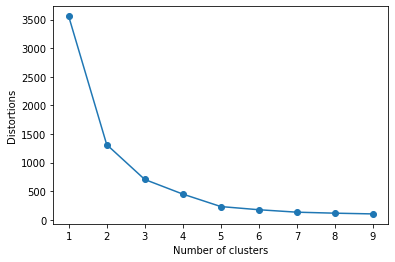

In [1739]:
distortion = Elbow_method(10, df_norm, KMeans)

In [1740]:
model = KMeans(n_clusters = 5, init = "k-means++")

In [1741]:
model.fit(df_norm)

KMeans(n_clusters=5)

In [1742]:
centers = model.cluster_centers_

Text(0.5, 1.0, 'Kmeans Center points and the datapoints')

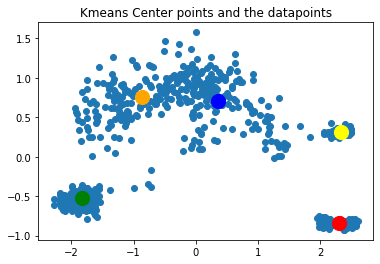

In [1753]:
plt.scatter(df_norm[:,0],df_norm[:,1])
plt.scatter(centers[0][0], centers[0][1],c = 'red', s=200)
plt.scatter(centers[1][0], centers[1][1], c = 'green', s=200)
plt.scatter(centers[2][0], centers[2][1], c = 'orange',s=200)
plt.scatter(centers[3][0], centers[3][1], c = 'blue',s=200)
plt.scatter(centers[4][0], centers[4][1], c = 'yellow',s=200)
plt.title("Kmeans Center points and the datapoints")

Text(0.5, 1.0, 'Kmeans visualization k = 5')

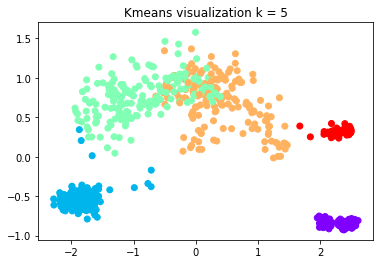

In [1754]:
plt.scatter(df_norm[:,0],df_norm[:,1], c=model.labels_, cmap='rainbow')
plt.title("Kmeans visualization k = 5")

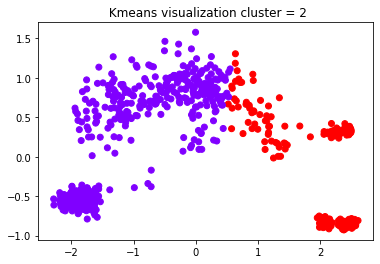

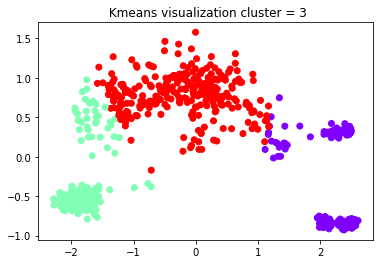

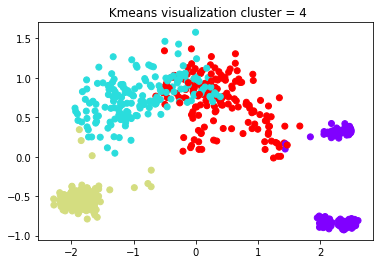

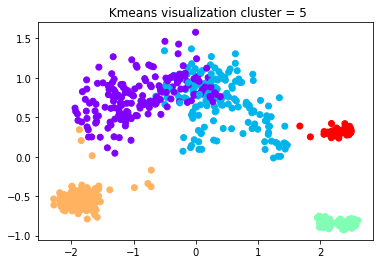

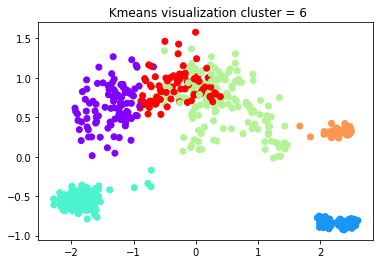

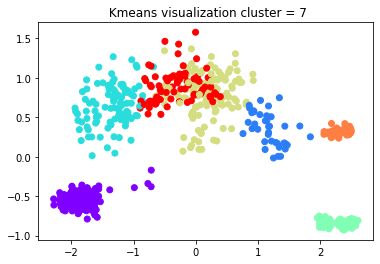

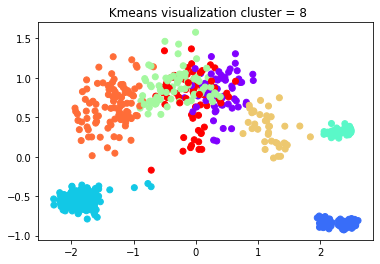

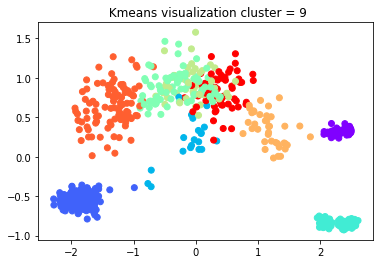

In [2019]:
for i in range(2,10):
    model = KMeans(n_clusters=i, init = "k-means++")
    model.fit_predict(df_norm)
    plt.scatter(df_norm[:,0],df_norm[:,1], c=model.labels_, cmap='rainbow')
    plt.title(f" Kmeans visualization cluster = {i}")
    plt.show()

## Q2 Using Agglomaritive clustering and Spectral clustering 

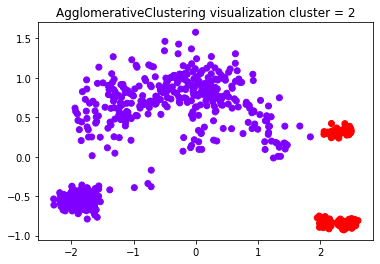

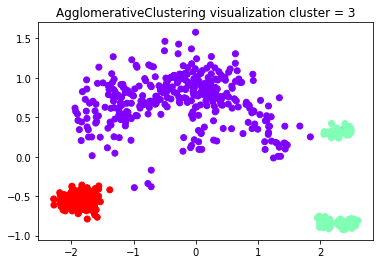

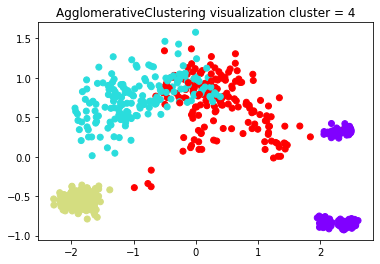

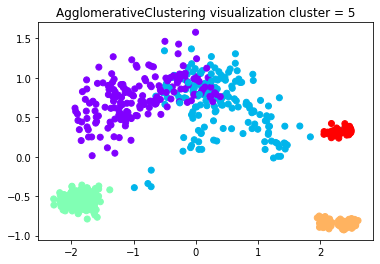

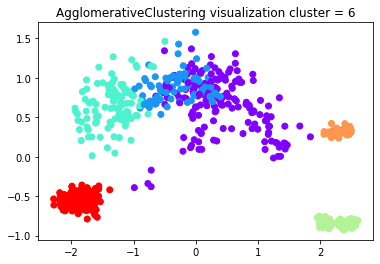

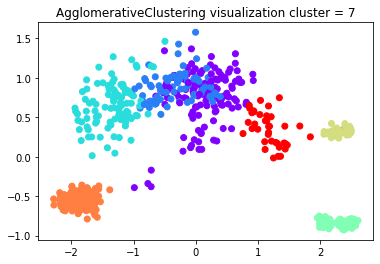

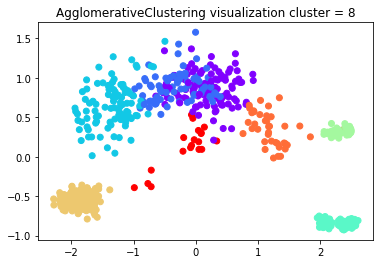

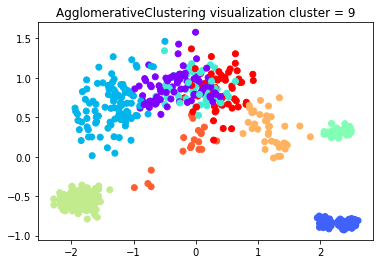

In [1750]:
for i in range(2,10):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean')
    cluster.fit_predict(df_norm)
    plt.scatter(df_norm[:,0],df_norm[:,1], c=cluster.labels_, cmap='rainbow')
    plt.title(f"AgglomerativeClustering visualization cluster = {i}")
    plt.show()

In [1751]:
clustering_validity(10,df_norm, AgglomerativeClustering )

clusters = 2  Silhouette Score is : 0.5568365676187177
clusters = 2  Davies Bouldin is : 0.6730393102054151
clusters = 2  Calinski Harabasz : 1308.4206424228719
____________________________________________________


clusters = 3  Silhouette Score is : 0.5764011223693646
clusters = 3  Davies Bouldin is : 0.7069065533552505
clusters = 3  Calinski Harabasz : 1645.59002541942
____________________________________________________


clusters = 4  Silhouette Score is : 0.623093946402652
clusters = 4  Davies Bouldin is : 0.6781932183483446
clusters = 4  Calinski Harabasz : 2031.6683780614944
____________________________________________________


clusters = 5  Silhouette Score is : 0.6969746727045265
clusters = 5  Davies Bouldin is : 0.5542756170707442
clusters = 5  Calinski Harabasz : 3098.602984741413
____________________________________________________


clusters = 6  Silhouette Score is : 0.6799772092924673
clusters = 6  Davies Bouldin is : 0.5953426119479828
clusters = 6  Calinski Harabasz 

Spectral Clustering

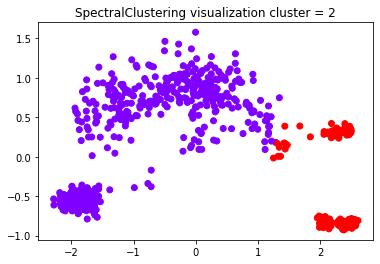

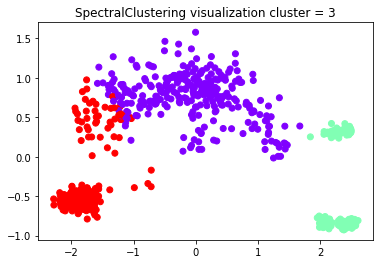

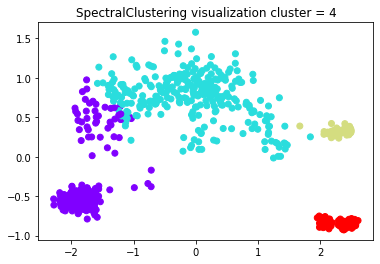

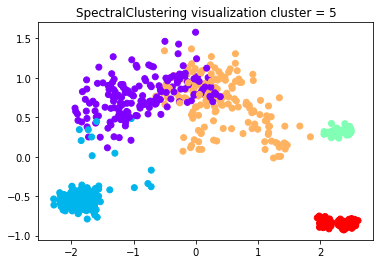

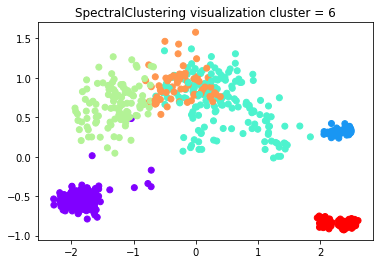

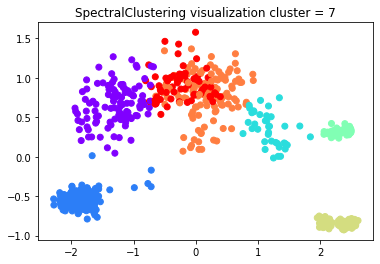

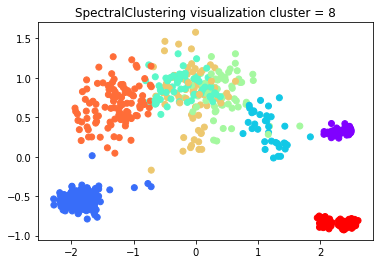

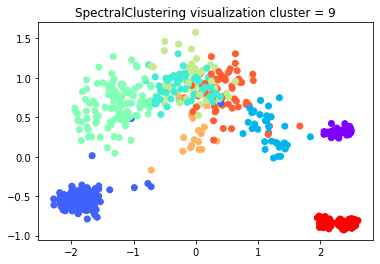

In [1757]:
for i in range(2,10):
    cluster2 = SpectralClustering(n_clusters=i)
    cluster2.fit_predict(df_norm)
    plt.scatter(df_norm[:,0],df_norm[:,1], c=cluster2.labels_, cmap='rainbow')
    plt.title(f"SpectralClustering visualization cluster = {i}")
    plt.show()

In [1758]:
clustering_validity(10,df_norm, SpectralClustering )

clusters = 2  Silhouette Score is : 0.5667792441289412
clusters = 2  Davies Bouldin is : 0.6678660053274584
clusters = 2  Calinski Harabasz : 1413.5818359492018
____________________________________________________


clusters = 3  Silhouette Score is : 0.5777198415714472
clusters = 3  Davies Bouldin is : 0.7336325903891948
clusters = 3  Calinski Harabasz : 1779.1219294135512
____________________________________________________


clusters = 4  Silhouette Score is : 0.6324676646065668
clusters = 4  Davies Bouldin is : 0.5767963629615536
clusters = 4  Calinski Harabasz : 1831.3282836111052
____________________________________________________


clusters = 5  Silhouette Score is : 0.6981041902677844
clusters = 5  Davies Bouldin is : 0.5422764682859156
clusters = 5  Calinski Harabasz : 3196.2641368862855
____________________________________________________


clusters = 6  Silhouette Score is : 0.6843586323676412
clusters = 6  Davies Bouldin is : 0.5720671478594763
clusters = 6  Calinski Harab

KNN:

clusters = 5 Silhouette Score is : 0.6999058095804216

clusters = 5 Davies Bouldin is : 0.5431627679265871

clusters = 5 Calinski Harabasz : 3238.1906725804324

Cluster = 5 is the best since Silhouette has highest score, Davis Bouldin has lowest score, but has a moderate Calinski score.


agl:

clusters = 5  Silhouette Score is : 0.6969746727045265

clusters = 5  Davies Bouldin is : 0.5542756170707442

clusters = 5  Calinski Harabasz : 3098.602984741413

Cluster = 5 is the best since Silhouette has highest score, Davis Bouldin has lowest score, but has a moderate Calinski score.

Spectral:

clusters = 5  Silhouette Score is : 0.6981041902677844

clusters = 5  Davies Bouldin is : 0.5422764682859156

clusters = 5  Calinski Harabasz : 3196.2641368862855

Cluster = 5 is the best since Silhouette has highest score, Davis Bouldin has lowest score, but has a moderate Calinski score.


Text(0.5, 1.0, 'True values')

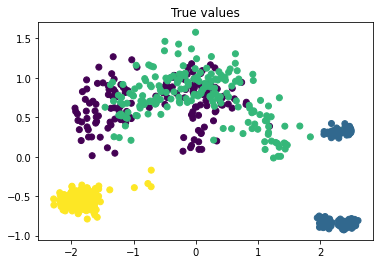

In [1791]:
plt.scatter(df_norm[:,0],df_norm[:,1], c=Label)
plt.title("True values")

Text(0.5, 1.0, 'KMeans 4 cluster')

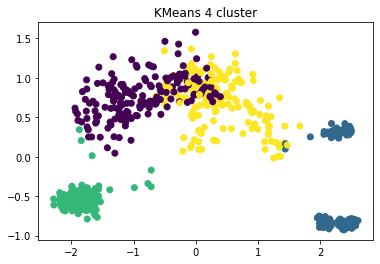

In [1790]:
model = KMeans(4, init = "k-means++")
pred = model.fit_predict(df_norm)
plt.scatter(df_norm[:,0],df_norm[:,1], c=model.labels_)
plt.title("KMeans 4 cluster")


Text(0.5, 1.0, 'Spectral Clustering 4 cluster')

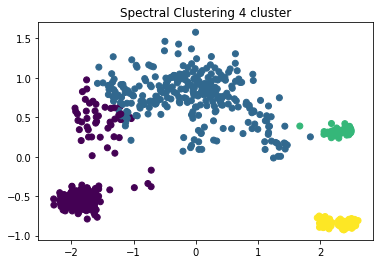

In [1789]:
model2 = SpectralClustering(4)
pred2=model2.fit_predict(df_norm)
plt.scatter(df_norm[:,0],df_norm[:,1], c=model2.labels_)
plt.title("Spectral Clustering 4 cluster")


Text(0.5, 1.0, 'Agglomerative Clustering 4 cluster')

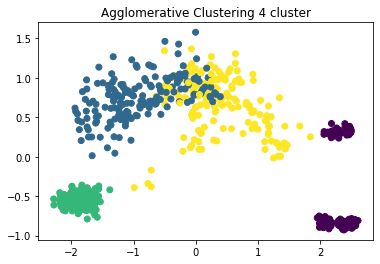

In [1788]:
model3 = AgglomerativeClustering(4)
pred3 = model3.fit_predict(df_norm)
plt.scatter(df_norm[:,0],df_norm[:,1], c=model3.labels_)
plt.title("Agglomerative Clustering 4 cluster")


In [1834]:
print("rand score", rand_score(Label, pred))
print("normalized ",normalized_mutual_info_score(Label, pred))
print("adjusted_mutual", adjusted_mutual_info_score(Label, pred))
print("homogeneity ",homogeneity_score(Label, pred))
print("completeness_score ",completeness_score(Label, pred))
print("fowlkes_mallows_score ",fowlkes_mallows_score(Label, pred))



rand score 0.9241026989006281
normalized  0.7837249673123983
adjusted_mutual 0.7829254264565861
homogeneity  0.7832918822641708
completeness_score  0.7841585315342894
fowlkes_mallows_score  0.8567913713303742


In [1835]:
print("rand score", rand_score(Label, pred2))
print("normalized ",normalized_mutual_info_score(Label, pred2))
print("adjusted_mutual", adjusted_mutual_info_score(Label, pred2))
print("homogeneity ",homogeneity_score(Label, pred2))
print("completeness_score ",metrics.completeness_score(Label, pred2))
print("fowlkes_mallows_score ",fowlkes_mallows_score(Label, pred2))


rand score 0.8590968941589939
normalized  0.7257640525717293
adjusted_mutual 0.7247279268924218
homogeneity  0.7103818343119089
completeness_score  0.7418271708871118
fowlkes_mallows_score  0.7476929591274925


In [1836]:
print("rand score", rand_score(Label, pred3))
print("normalized ",metrics.normalized_mutual_info_score(Label, pred3))
print("adjusted_mutual", adjusted_mutual_info_score(Label, pred3))
print("homogeneity ",homogeneity_score(Label, pred2))
print("completeness_score ",metrics.completeness_score(Label, pred3))
print("fowlkes_mallows_score ",fowlkes_mallows_score(Label, pred3))



rand score 0.9239371968330693
normalized  0.7922185853765249
adjusted_mutual 0.7914522079183779
homogeneity  0.7103818343119089
completeness_score  0.7909026383536382
fowlkes_mallows_score  0.8556724301361561


# Summary and Discussion

#### Knn and Agglomerative have better perfromance than spectral clustering

#### Knn vs Agglomerative:

#### rand score (KNN) 

#### Normalize mutual (Agglomerative) 

#### Adjusted mutual ( Agglomerative)

#### Homogeneity (KNN)

#### Completeness score ( Agglomerative)

#### Fowlkes Mallows score (KNN)



In [ ]:
## Unsupervised machine learning

# Steps followed:
### 1) Delete the duplicated columns
### 2) Delete columns that has more than 5% of outliers
### 3) Split data to Data for clustering and labels for testing 
### 4) Find best K for the 3 functions KMeans ++, Spectral cluster, and Agglomerative Cluster
### 5) Compare performance

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from xgboost import XGBClassifier as XGC
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import linear_model
from sklearn.feature_selection import RFECV
from sklearn import metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score
from sklearn.cluster import SpectralClustering,AgglomerativeClustering, KMeans
from sklearn.metrics import normalized_mutual_info_score, homogeneity_score,completeness_score, rand_score,adjusted_mutual_info_score
from sklearn.metrics.cluster import pair_confusion_matrix,contingency_matrix, fowlkes_mallows_score


Data = pd.read_csv("G:\dataset.csv")
Data

def plot_L(df,Label):
    for i in range(len(df.columns)-1):
        plt.scatter(Label.iloc[:,i], df.iloc[:,i])
        plt.xlabel(f"{df.columns[i]}")
        plt.ylabel(f"{df.columns[i+1]}")
        plt.show()

plot_L(Data.iloc[:,:-2], Data.iloc[:,1:-1])

df = Data
d =rmv_ls(df)
df.loc[:,d]

df = df.drop(d,axis = 1)

df

### Removing outliers

def rm_box(Data):
    lis_del=[]
    for i in range(len(Data.columns)-1):
        IQR = (Data.iloc[:,i].quantile(0.75)) - (Data.iloc[:,i].quantile(0.25))
        Q4 = Data.iloc[:,i].quantile(0.75) + (1.5 *IQR )
        Q1 =  Data.iloc[:,i].quantile(0.25) - (1.5 * IQR)
        raws_1= Data.iloc[:,i]< Q4
        raws_2= Data.iloc[:,i]> Q1 
        total_raws = abs(sum(raws_1) - sum(raws_2))
#             print(total_raws)
        Data = Data[raws_1]
        Data = Data[raws_2]
#             lis_del.append(total_raws)
#     print(sum(lis_del))
    return Data

### List that has many outliers more than 4%

def rm_box_f(Data):
    lis_del=[]
    for i in range(len(Data.columns)-1):
        IQR = (Data.iloc[:,i].quantile(0.75)) - (Data.iloc[:,i].quantile(0.25))
        Q4 = Data.iloc[:,i].quantile(0.75) + (1.5 *IQR )
        Q1 =  Data.iloc[:,i].quantile(0.25) - (1.5 * IQR)
        raws_1= Data.iloc[:,i]< Q4
        raws_2= Data.iloc[:,i]> Q1 
        total_raws = abs(sum(raws_1) - sum(raws_2))
        if total_raws >5:
            lis_del.append(Data.columns[i])
#     print(sum(lis_del))
    return lis_del

ls = rm_box_f(df)
ls

df_d = df.drop(ls, axis=1)

df_d

df_rm = rm_box(df_d)

df_rm.iloc[:,-1].value_counts()


df_rm.iloc[:,:]

encoder2 = LabelEncoder()
norm = MinMaxScaler()
Label = df1.iloc[:,-1]
df_norm = norm.fit_transform(df_rm.iloc[:,:-1])

### Using PCA with variance 0.8

pca = PCA(n_components=0.8)
df_norm = pca.fit_transform(df_norm)
pca.explained_variance_ratio_

df_norm.shape

pca.explained_variance_ratio_[:4].sum()

Label = encoder2.fit_transform(Label)

### Elbow function plotter

def plot_Elbow_result(number_clusters, distortion):
    plt.plot(range(1,number_clusters), distortion, marker='o')
    plt.plot()
    plt.xlabel("Number of clusters")
    plt.ylabel("Distortions")
    plt.show()
def Elbow_method(number_clusters, data, cluster):
    distortion = []
    for i in range(1, number_clusters):
        model = cluster(n_clusters = i)
        model.fit(data)
        distortion.append(model.inertia_)
    plot_Elbow_result(number_clusters, distortion)
    

### Clustering validity function


def clustering_validity(number_clusters, data, cluster):
        for i in range(2, number_clusters):
            if cluster == KMeans:
                model = cluster(n_clusters = i, init='k-means++')
            else: 
                model = cluster(n_clusters = i )
           
            labels = model.fit_predict(data)
            si_score = silhouette_score(data, labels)
            print(f"clusters = {i} ",f"Silhouette Score is : {si_score}")
            db_score = davies_bouldin_score(data, labels)
            print(f"clusters = {i} ",f"Davies Bouldin is : {db_score}")
            CH_score = calinski_harabasz_score(data, labels)
            print(f"clusters = {i} ",f"Calinski Harabasz : {CH_score}")
            print('____________________________________________________')
            print("\n")
        
    

Kmean = KMeans(n_clusters=4)
Kmean.fit(df_norm)

clustering_validity(10, df_norm, KMeans)

clusters = 5  Silhouette Score is : 0.6999058095804216

clusters = 5  Davies Bouldin is : 0.5431627679265871

clusters = 5  Calinski Harabasz : 3238.1906725804324

Cluster = 5 is the best since Silhouette has highest score, Davis Bouldin has lowest score, but has a moderate Calinski score.

### Elbow

distortion = Elbow_method(10, df_norm, KMeans)

 

model = KMeans(n_clusters = 5, init = "k-means++")

model.fit(df_norm)

centers = model.cluster_centers_

plt.scatter(df_norm[:,0],df_norm[:,1])
plt.scatter(centers[0][0], centers[0][1],c = 'red', s=200)
plt.scatter(centers[1][0], centers[1][1], c = 'green', s=200)
plt.scatter(centers[2][0], centers[2][1], c = 'orange',s=200)
plt.scatter(centers[3][0], centers[3][1], c = 'blue',s=200)
plt.scatter(centers[4][0], centers[4][1], c = 'yellow',s=200)
plt.title("Kmeans Center points and the datapoints")

plt.scatter(df_norm[:,0],df_norm[:,1], c=model.labels_, cmap='rainbow')
plt.title("Kmeans visualization k = 5")

for i in range(2,10):
    model = KMeans(n_clusters=i, init = "k-means++")
    model.fit_predict(df_norm)
    plt.scatter(df_norm[:,0],df_norm[:,1], c=model.labels_, cmap='rainbow')
    plt.title(f" Kmeans visualization cluster = {i}")
    plt.show()

## Q2 Using Agglomaritive clustering and Spectral clustering 





for i in range(2,10):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean')
    cluster.fit_predict(df_norm)
    plt.scatter(df_norm[:,0],df_norm[:,1], c=cluster.labels_, cmap='rainbow')
    plt.title(f"AgglomerativeClustering visualization cluster = {i}")
    plt.show()

clustering_validity(10,df_norm, AgglomerativeClustering )

Spectral Clustering

for i in range(2,10):
    cluster2 = SpectralClustering(n_clusters=i)
    cluster2.fit_predict(df_norm)
    plt.scatter(df_norm[:,0],df_norm[:,1], c=cluster2.labels_, cmap='rainbow')
    plt.title(f"SpectralClustering visualization cluster = {i}")
    plt.show()

clustering_validity(10,df_norm, SpectralClustering )

 

KNN:

clusters = 5 Silhouette Score is : 0.6999058095804216

clusters = 5 Davies Bouldin is : 0.5431627679265871

clusters = 5 Calinski Harabasz : 3238.1906725804324

Cluster = 5 is the best since Silhouette has highest score, Davis Bouldin has lowest score, but has a moderate Calinski score.


agl:

clusters = 5  Silhouette Score is : 0.6969746727045265

clusters = 5  Davies Bouldin is : 0.5542756170707442

clusters = 5  Calinski Harabasz : 3098.602984741413

Cluster = 5 is the best since Silhouette has highest score, Davis Bouldin has lowest score, but has a moderate Calinski score.

Spectral:

clusters = 5  Silhouette Score is : 0.6981041902677844

clusters = 5  Davies Bouldin is : 0.5422764682859156

clusters = 5  Calinski Harabasz : 3196.2641368862855

Cluster = 5 is the best since Silhouette has highest score, Davis Bouldin has lowest score, but has a moderate Calinski score.


plt.scatter(df_norm[:,0],df_norm[:,1], c=Label)
plt.title("True values")

model = KMeans(4, init = "k-means++")
pred = model.fit_predict(df_norm)
plt.scatter(df_norm[:,0],df_norm[:,1], c=model.labels_)
plt.title("KMeans 4 cluster")


model2 = SpectralClustering(4)
pred2=model2.fit_predict(df_norm)
plt.scatter(df_norm[:,0],df_norm[:,1], c=model2.labels_)
plt.title("Spectral Clustering 4 cluster")


model3 = AgglomerativeClustering(4)
pred3 = model3.fit_predict(df_norm)
plt.scatter(df_norm[:,0],df_norm[:,1], c=model3.labels_)
plt.title("Agglomerative Clustering 4 cluster")




print("rand score", rand_score(Label, pred))
print("normalized ",normalized_mutual_info_score(Label, pred))
print("adjusted_mutual", adjusted_mutual_info_score(Label, pred))
print("homogeneity ",homogeneity_score(Label, pred))
print("completeness_score ",completeness_score(Label, pred))
print("fowlkes_mallows_score ",fowlkes_mallows_score(Label, pred))



print("rand score", rand_score(Label, pred2))
print("normalized ",normalized_mutual_info_score(Label, pred2))
print("adjusted_mutual", adjusted_mutual_info_score(Label, pred2))
print("homogeneity ",homogeneity_score(Label, pred2))
print("completeness_score ",metrics.completeness_score(Label, pred2))
print("fowlkes_mallows_score ",fowlkes_mallows_score(Label, pred2))


print("rand score", rand_score(Label, pred3))
print("normalized ",metrics.normalized_mutual_info_score(Label, pred3))
print("adjusted_mutual", adjusted_mutual_info_score(Label, pred3))
print("homogeneity ",homogeneity_score(Label, pred2))
print("completeness_score ",metrics.completeness_score(Label, pred3))
print("fowlkes_mallows_score ",fowlkes_mallows_score(Label, pred3))



# Summary and Discussion

#### Knn and Agglomerative have better perfromance than spectral clustering

#### Knn vs Agglomerative:

#### rand score (KNN) 

#### Normalize mutual (Agglomerative) 

#### Adjusted mutual ( Agglomerative)

#### Homogeneity (KNN)

#### Completeness score ( Agglomerative)

#### Fowlkes Mallows score (KNN)

